In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import math

import plotly.express as px

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


## Historical Stock Data

### Multiple Stocks Data (multi_stocks)

In [2]:
from datetime import date
#today = date.today()
today = '04-30-2021'
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            label_font = {'weight':'bold','size':18}
            plt.title("Historical Adjusted Price Data",fontdict=label_font)
            plt.xlabel('Dates')
            plt.ylabel('Stocks Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Symbols,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.393257,103.436539,25.400000,NaN,23.433638,NaN
2017-01-04,26.625195,103.266876,26.200001,NaN,23.619688,NaN
2017-01-05,26.881132,104.347321,26.400000,NaN,24.262403,NaN
2017-01-06,26.777161,103.847282,27.400000,NaN,24.042524,NaN
2017-01-09,26.769159,103.829422,28.400000,NaN,24.127094,NaN
...,...,...,...,...,...,...
2021-05-03,39.441368,165.210007,195.119995,186.020004,53.700001,208.899994
2021-05-04,39.560196,167.770004,180.669998,173.589996,52.930000,176.880005
2021-05-05,39.580002,167.070007,171.740005,162.839996,53.650002,170.770004


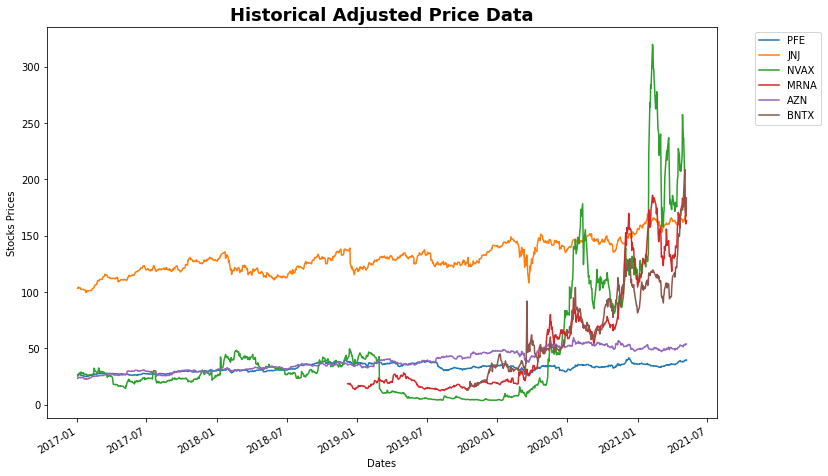

In [3]:
multi_stock_data = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=True, stock_value='Adj Close')
multi_stock_data

In [4]:
multi_stock_data.to_csv('multi_pharm_data')

In [5]:
#start='2017',end='today'
multi_stocks = pd.read_csv('multi_pharm_data', parse_dates=True, index_col='Date')

#### Multiple Stock Plot

In [6]:
def multi_plot(df, stock_value=None):
    #plt.figure(figsize=(12,8))
    df.plot(figsize=(12,8))
    label_font = {'weight':'bold','size':18}
    plt.xlabel('Date',fontdict=label_font)
    plt.ylabel(f'{stock_value} Price USD ($)',fontdict=label_font)
    plt.title(f'Historical {stock_value} Price',fontdict=label_font)            

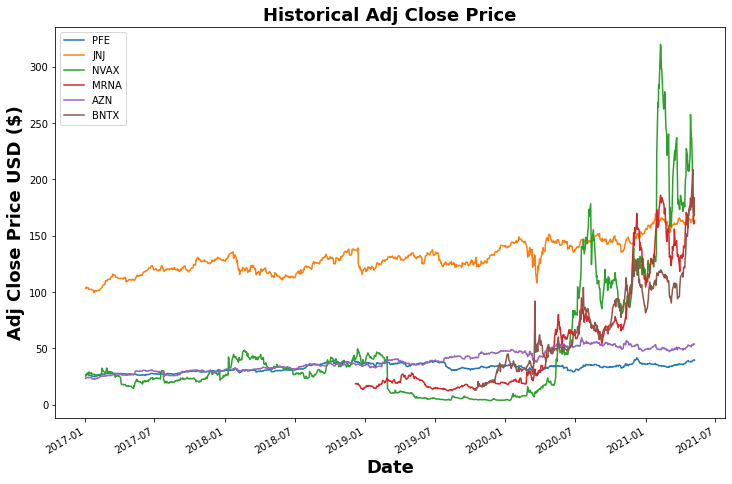

In [7]:
multi_plot(multi_stocks, stock_value='Adj Close')

In [8]:
multi_stocks.describe()

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
count,1094.000000,1094.000000,1094.000000,608.000000,1094.000000,397.000000
mean,32.708488,130.827380,48.151965,55.319581,39.002276,70.957431
std,3.689415,14.563264,57.195907,49.371516,9.269537,38.264637
min,24.913631,99.793396,3.690000,12.260000,22.596422,12.750000
25%,29.869446,120.387264,14.072500,18.114999,30.903034,38.580002
50%,33.083639,128.574722,27.600000,26.095000,36.707993,66.120003
75%,35.891665,141.196846,44.000000,72.569998,47.813596,100.389999
max,41.691181,169.423508,319.929993,186.020004,59.466022,208.899994


### Single Stock Data (pfe_stock_data)

In [9]:
def single_stock_data(symbol, start,end=None,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)
        df_single = pd.DataFrame(df)
        print("Dataframe has {} rows and {} columns".format(df_single.shape[0],df_single.shape[1]))
        print()
        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(df_single[stock_value])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical {stock_value} Price for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
        return df_single
        
    except Exception as e:
        #if inccorect symbol is inputted, error message displayed
        print("Error occured/Incorrect Symbol:", e)
        #data = 'Incorrect Symbol'


This is data for Pfizer.

Dataframe has 1094 rows and 6 columns



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,31.309298,30.920303,31.024668,31.309298,23391844.0,26.393257
2017-01-04,31.641365,31.337761,31.432638,31.584440,22753963.0,26.625195
2017-01-05,31.963947,31.423149,31.660341,31.888046,21083584.0,26.881132
2017-01-06,31.973434,31.631880,31.935484,31.764706,18418228.0,26.777161
2017-01-09,31.944971,31.669828,31.717268,31.755219,21559886.0,26.769159
...,...,...,...,...,...,...
2021-05-03,39.840000,38.959999,39.040001,39.830002,46638600.0,39.441368
2021-05-04,40.169998,39.430000,40.000000,39.950001,52802200.0,39.560196
2021-05-05,41.090000,38.930000,40.180000,39.970001,54348400.0,39.580002


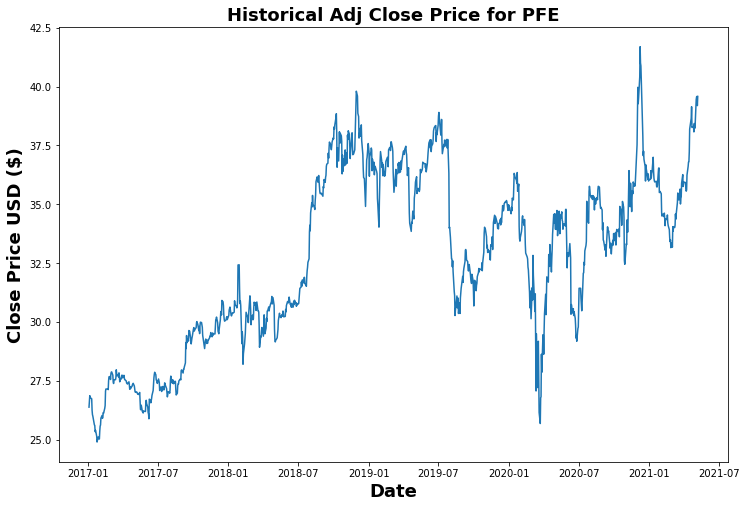

In [10]:
start='01-01-2017'
end='today'
pfe_stock = single_stock_data('PFE', start= start,end='today',plot=True,stock_value='Adj Close')
pfe_stock

In [11]:
pfe_stock.to_csv('pfe_stock')
pfe_stock_df = pd.read_csv('pfe_stock', parse_dates=True, index_col='Date')
#single_stock['Close']['2015-04-01':'2015-12-01'].plot()
pfe_stock_data = pfe_stock_df[['Close','Volume','Adj Close']]

In [12]:
pfe_stock_data.describe()

,Close,Volume,Adj Close
count,1094.000000,1.094000e+03,1094.000000
mean,35.641638,2.618101e+07,32.708488
std,3.271957,1.363625e+07,3.689415
min,27.030361,5.187683e+06,24.913631
25%,33.510108,1.830084e+07,29.869446
50%,34.924999,2.307854e+07,33.083639
75%,38.084350,2.966483e+07,35.891665
max,43.861481,2.301539e+08,41.691181


#### Single Stock Plot

In [13]:
def single_plot(df,stock_value=None, stock_symbol=None):
    df[stock_value].plot(figsize=(12,8))
    label_font = {'weight':'bold','size':18}
    plt.xlabel('Date',fontdict=label_font)
    plt.ylabel(f'{stock_value} Price USD ($)',fontdict=label_font)
    plt.title(f'{stock_symbol} {stock_value} History',fontdict=label_font)                

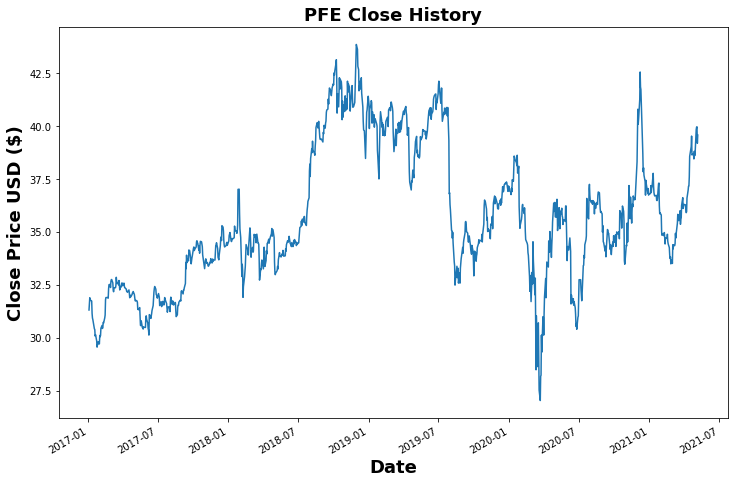

In [14]:
single_plot(pfe_stock_data, stock_value='Close', stock_symbol='PFE')

## Question 2: <br>Does the SARIMA algorithm perform better in predicting future stocks price with the Adj Close column or Technical Indicators ? 
This section focuses on using SARIMA models to predict future stock prices.  Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting.  Although the method can handle data with a trend, it does not support time series with a seasonal component.  Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

I will be working with univariate time series datasets.  I have created various functions which make it easy to work with different datasets and get corresponding predictions and plots.  I am starting with Pfizer then I will run the model with BVAX for a comparison.<br>
I created the function delta_data in order to add the calculations from the Techincal Indicators section to the stock dataset I obtained from Datareader.  I will be working with the columns Adj Close, MA_50 and Actual_Changes.

Adj Close:
<br>
The data covers the time period 3/15/17 to 4/1/21.  I applied the describe function to the 'Adj Close' column which provides a quick statistical overview of the data.  The average price of the stock was \\$33.20.  Regarding price range, the lowest price it reached was \\$25.95 and the highest was \\$42.10.  The std was 3.497 so the data points generally didn't deviate that far from each other.<br>
<br>

To make the predictions I will be using One-Step Ahead forecasting and Dynamic Forecasting. One Step Ahead static and dynamic forecasts are similar. The difference is with their estimation procedures. Dynamic forecasts use the value of the previous forecasted value of the dependent variable to compute the next one. Static forecast use the actual value for each subsequent forecast.

In [15]:
#start='01-01-2019',end='today',
#df_single = single_stock_data('PFE', start='01-01-2019',end='today',plot=True,stock_value='Adj Close')

## Sarima Model

In [16]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
import pmdarima as pm
from pmdarima import auto_arima

import statsmodels.api as sm

In [17]:
sarima_data = pfe_stock_data.copy()

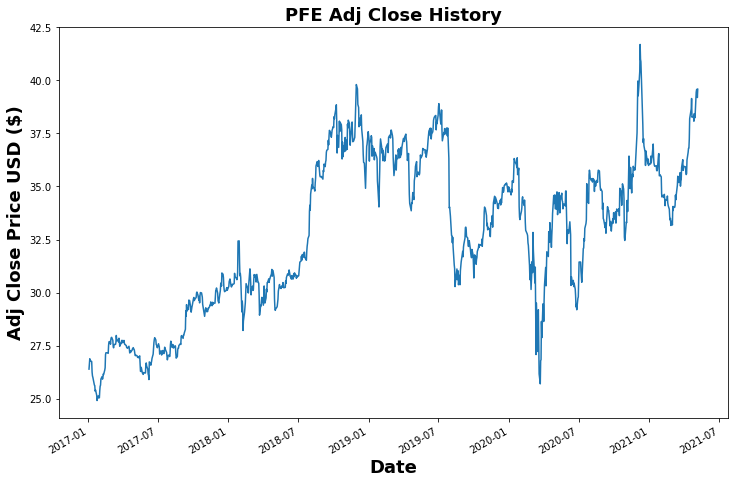

In [18]:
single_plot(pfe_stock_data, stock_value='Adj Close', stock_symbol='PFE')

#### Delta_data

In [19]:
def delta_data(data,col=None):
    data['Actual_Changes'] = data[col] - data[col].shift(1)
    data['Percent_Chg'] = data[col].pct_change(1)
    data['MA_50'] = data[col].rolling(50).mean()
    
    data = data.dropna()
    return data

In [20]:
sarima_df = delta_data(sarima_data,col='Adj Close')#delta_time_series(multi_stocks, col='Adj Close')
sarima_df

,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,
2017-03-15,32.855785,24279839.0,27.979099,0.331263,0.011982,26.540320
2017-03-16,32.666035,21816219.0,27.817513,-0.161587,-0.005775,26.568806
2017-03-17,32.561668,45736117.0,27.728630,-0.088882,-0.003195,26.590874
2017-03-20,32.618595,18435514.0,27.777109,0.048479,0.001748,26.608794
2017-03-21,32.495255,33083479.0,27.672075,-0.105034,-0.003781,26.626692
...,...,...,...,...,...,...
2021-05-03,39.830002,46638600.0,39.441368,1.168488,0.030530,35.873521
2021-05-04,39.950001,52802200.0,39.560196,0.118828,0.003013,35.986210
2021-05-05,39.970001,54348400.0,39.580002,0.019806,0.000501,36.106228


In [21]:
sarima_df

,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,
2017-03-15,32.855785,24279839.0,27.979099,0.331263,0.011982,26.540320
2017-03-16,32.666035,21816219.0,27.817513,-0.161587,-0.005775,26.568806
2017-03-17,32.561668,45736117.0,27.728630,-0.088882,-0.003195,26.590874
2017-03-20,32.618595,18435514.0,27.777109,0.048479,0.001748,26.608794
2017-03-21,32.495255,33083479.0,27.672075,-0.105034,-0.003781,26.626692
...,...,...,...,...,...,...
2021-05-03,39.830002,46638600.0,39.441368,1.168488,0.030530,35.873521
2021-05-04,39.950001,52802200.0,39.560196,0.118828,0.003013,35.986210
2021-05-05,39.970001,54348400.0,39.580002,0.019806,0.000501,36.106228


In [22]:
sarima_df['Adj Close'].describe()

count    1045.000000
mean       32.999090
std         3.510389
min        25.699234
25%        30.234791
50%        33.425819
75%        35.980194
max        41.691181
Name: Adj Close, dtype: float64

In [23]:
sarima_df.describe()

,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
count,1045.000000,1.045000e+03,1045.000000,1045.000000,1045.000000,1045.000000
mean,35.847197,2.613372e+07,32.999090,0.011418,0.000449,32.751853
std,3.196304,1.387090e+07,3.510389,0.478460,0.014556,3.305040
min,27.030361,5.187683e+06,25.699234,-2.487129,-0.077347,26.540320
25%,33.738140,1.809781e+07,30.234791,-0.180798,-0.005501,30.255774
50%,35.037952,2.272730e+07,33.425819,0.009903,0.000303,33.050429
75%,38.557877,2.955722e+07,35.980194,0.222145,0.006761,36.005223
max,43.861481,2.301539e+08,41.691181,2.602318,0.089607,37.742444


##### Train/Test Split

In [24]:
train = sarima_df[:int(0.8*(len(sarima_df)))]
test = sarima_df[int(0.8*(len(sarima_df))):]

In [25]:
len(sarima_df),len(train), len(test)

(1045, 836, 209)

In [26]:
test

,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,
2020-07-10,32.096775,24459019.0,30.820267,0.337082,0.011058,32.408542
2020-07-13,33.406071,56569129.0,32.077492,1.257225,0.040792,32.358044
2020-07-14,33.425049,32854129.0,32.095715,0.018223,0.000568,32.320900
2020-07-15,33.889942,26294454.0,32.542118,0.446404,0.013909,32.293044
2020-07-16,33.776093,18421812.0,32.432796,-0.109322,-0.003359,32.246946
...,...,...,...,...,...,...
2021-05-03,39.830002,46638600.0,39.441368,1.168488,0.030530,35.873521
2021-05-04,39.950001,52802200.0,39.560196,0.118828,0.003013,35.986210
2021-05-05,39.970001,54348400.0,39.580002,0.019806,0.000501,36.106228


In [27]:
test['Adj Close'].describe()

count    209.000000
mean      35.380223
std        1.896044
min       30.820267
25%       34.000900
50%       35.279617
75%       36.068356
max       41.691181
Name: Adj Close, dtype: float64

##### Auto ARIMA Model Function

In [28]:
def arima_model(df):
    """
    df- dataframe
    function is a gridsearch to get optimal p,d,qs and lowest AIC for the model.
    q-is moving average
    """
    autoarima_model = auto_arima(df, start_p = 0, start_q = 0, #start_q = 0
                              test='adf',             # use adftest to find optimal 'd'
                              max_p = 3, max_q = 3,   # maximum p and q
                              m = 12,                  #frequency of series 
                              d = None,               # let model determine 'd', was 1
                              seasonal = True, 
                              start_P=0, D=1, trace = False, #start  #trace= True
                              error_action ='ignore',   # we don't want to know if an order does not work 
                              suppress_warnings = True,  # we don't want convergence warnings 
                              stepwise = True)           # set to stepwise  
    
    #print('\n')
    #display(autoarima_model.summary())
    
    return autoarima_model


In [29]:
adj_close = 'Adj Close'
ma_50 = 'MA_50'
actual_changes = 'Actual_Changes'

#### Pfizer / Adj Close

##### Code to get PDQs and AIC

In [30]:
#for loop iterates to get the PDQs, Seasonal PDQs and AICS for each column
arima_list = [['hist', 'pdq','seasonal_pdq','aic']] 
for col in sarima_df.columns:
  zip_test_2 = arima_model(sarima_df[col])
  arima_list.append([col,zip_test_2.order, zip_test_2.seasonal_order, zip_test_2.aic()])
#result   
output_df = pd.DataFrame(arima_list[1:],columns=arima_list[0]) 
output_df  

,hist,pdq,seasonal_pdq,aic
0,Close,"(3, 0, 0)","(1, 1, 1, 12)",1607.649422
1,Volume,"(1, 0, 1)","(1, 1, 2, 12)",36688.245535
2,Adj Close,"(3, 0, 0)","(1, 1, 1, 12)",1461.259035
3,Actual_Changes,"(1, 0, 3)","(1, 1, 1, 12)",1458.431776
4,Percent_Chg,"(1, 0, 0)","(0, 1, 1, 12)",-5753.104538
5,MA_50,"(2, 0, 0)","(0, 1, 1, 12)",-5940.105920


In [31]:
#function that fit SARIMA model
def fit_ARIMA(df, order=None, seasonal_order=None):
    """
    forecasting statsmodel SARIMAX model
    """
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df, 
                                        order=order, 
                                        seasonal_order=seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    #display / no tables 1
    display(output.summary())
    
    print('\n')
    print('MODEL DIAGNOSTICS')
    
    output.plot_diagnostics(figsize=(15, 18));
    plt.show()
    
    return output

#### One Step Ahead Forecasting

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                 1045
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -721.518
Date:                              Mon, 10 May 2021   AIC                           1455.036
Time:                                      09:43:22   BIC                           1484.590
Sample:                                           0   HQIC                          1466.259
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9288      0.019     48.465      0.000       0.891       0.966
ar.L2          0.1160      0.025      4.582      0.000       0.066       0.166
ar.L3         -0.0543      0.020     -2.695      0.007      -0.094      -0.015
ar.S.L12       0.0418      0.027      1.538      0.124      -0.011       0.095
ma.S.L12      -1.0000     87.636     -0.011      0.991    -172.763     170.763
sigma2         0.2296     20.118      0.011      0.991     -39.202      39.661
===================================================================================
Ljung-Box (Q):                       82.96   Jarque-Bera (JB):              1152.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.85   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


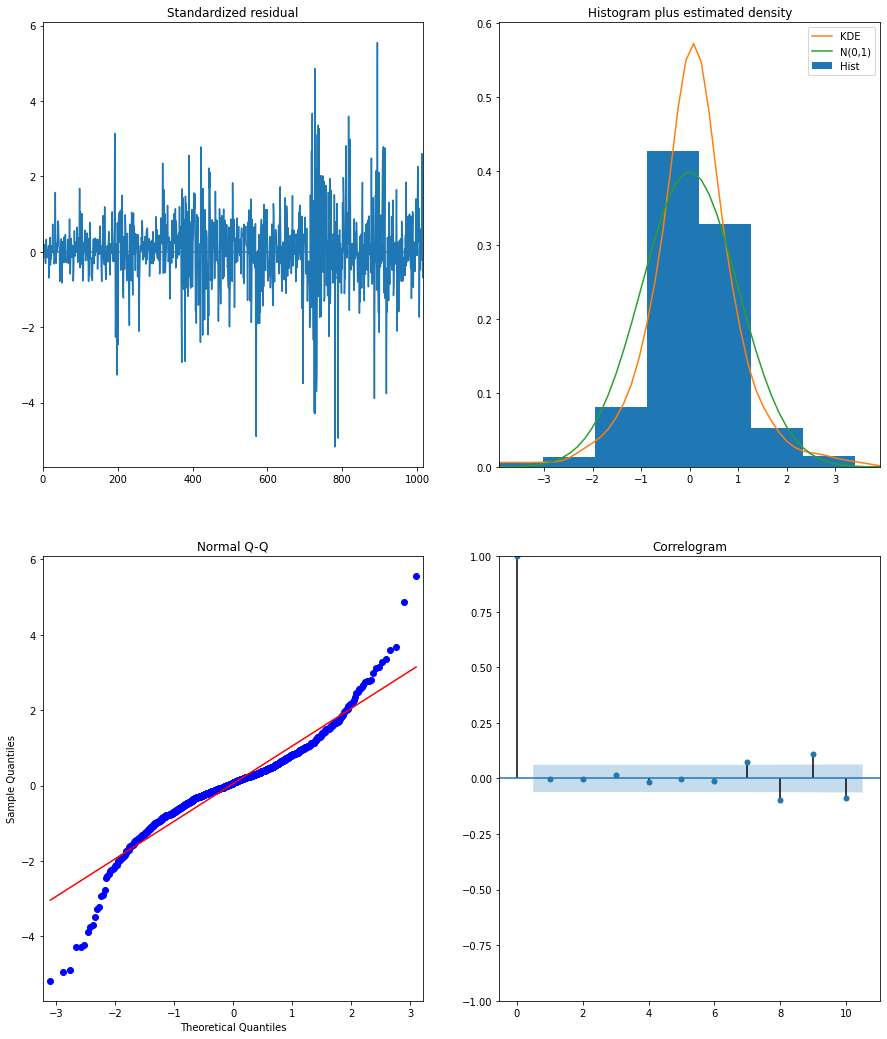

In [32]:
#code for one-step ahead forecasting
hist_type = adj_close #hist_type = 'Adj Close'
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2020-06-05'), dynamic=False)
pred_conf = pred.conf_int()

##### One-Step Ahead Plot

This plot pertains to the One Step Ahead Forecasting.  The green line in the plot represents the prediction. The green line has a shaded green area around it called the confidence intervals.  What are confidence intervals?  Confidence intervals are a range in values.  The default alpha of .05 returns a 95% confidence interval.  A 95% confidence interval represents that if we take an infinite number of samples from the population, calculate the interval each time, then in 95% of those intervals, the interval will contain the true population mean.   This represents the model’s uncertainty in the forecast.  <br> 
In this case, the confidence interval width is set at 95%, meaning we expect that this range will contain the actual value 95% of the time. Any time a prediction is made we must include a confidence interval.<br>
The orange line represents the test set. We can tell from the plot that the model is performing pretty well because the green line follows the orange line closely.  When the RMSE metric is applied to the model to evaluate its performence we see that the model's performance was 0.54.  The average price of the stock was \\$33.22.  This means that in making the predictions the model was off 0.54.  The model did a pretty good job at forecasting the prediction.<br>

In [33]:
def one_step(train, test, one_adj_c, pred, pred_conf):
    plt.figure(figsize=(12,6))
    # Plot observed values

    #ax = train['Adj Close']['2019':].plot(label='observed')
    ax = train[one_adj_c ]['2019':].plot(label='observed')#
    #test['Adj Close']['2019':].plot()#label='Test'
    test[one_adj_c]['2019':].plot()#label='Test'
    # Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

    # Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=0.5)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Sale Price')
    plt.legend()

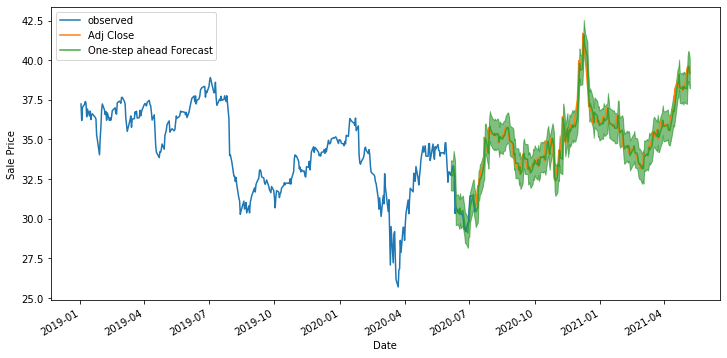

In [34]:
one_step_forecast = one_step(train=train, test=test, one_adj_c= adj_close, pred=pred,pred_conf=pred_conf)

##### Metrics Function for One-Step Ahead

In [35]:
def metric_func_one(pred, test, sarima_col):
    # Get the real and predicted values
    forecast = pred.predicted_mean
    actual =test[sarima_col] #actual =test['Adj Close']['1996':], was RMSE 0.54

    #root mean square error
    mse = ((forecast - actual) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
    #np.sqrt(np.mean((predictions-targets)**2))
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
    
    return mse, rmse

In [36]:
one_mse_adj, one_rmse_adj = metric_func_one(pred, test, sarima_col= adj_close)

The Mean Squared Error of our forecasts is 0.29
The Root Mean Squared Error of our forecasts is 0.53


In [37]:
one_rmse_adj

0.5348210863515385

#### Dynamic Forecasting 
The average price for 'Adj Close' is \\$33.215.  The average price for the test set is \\$35.01.  The green line is the prediction.  It looks like the model predicted the price to be around \\$34.00.  It looks like the model did a pretty good job in making predictions because the predictions are close to the average price.  The below metric function shows that the model's performance was \\$2.71, so for the predictions the model was off \\$2.71.   

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                 1045
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -721.518
Date:                              Mon, 10 May 2021   AIC                           1455.036
Time:                                      09:43:29   BIC                           1484.590
Sample:                                           0   HQIC                          1466.259
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9288      0.019     48.465      0.000       0.891       0.966
ar.L2          0.1160      0.025      4.582      0.000       0.066       0.166
ar.L3         -0.0543      0.020     -2.695      0.007      -0.094      -0.015
ar.S.L12       0.0418      0.027      1.538      0.124      -0.011       0.095
ma.S.L12      -1.0000     87.636     -0.011      0.991    -172.763     170.763
sigma2         0.2296     20.118      0.011      0.991     -39.202      39.661
===================================================================================
Ljung-Box (Q):                       82.96   Jarque-Bera (JB):              1152.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.85   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


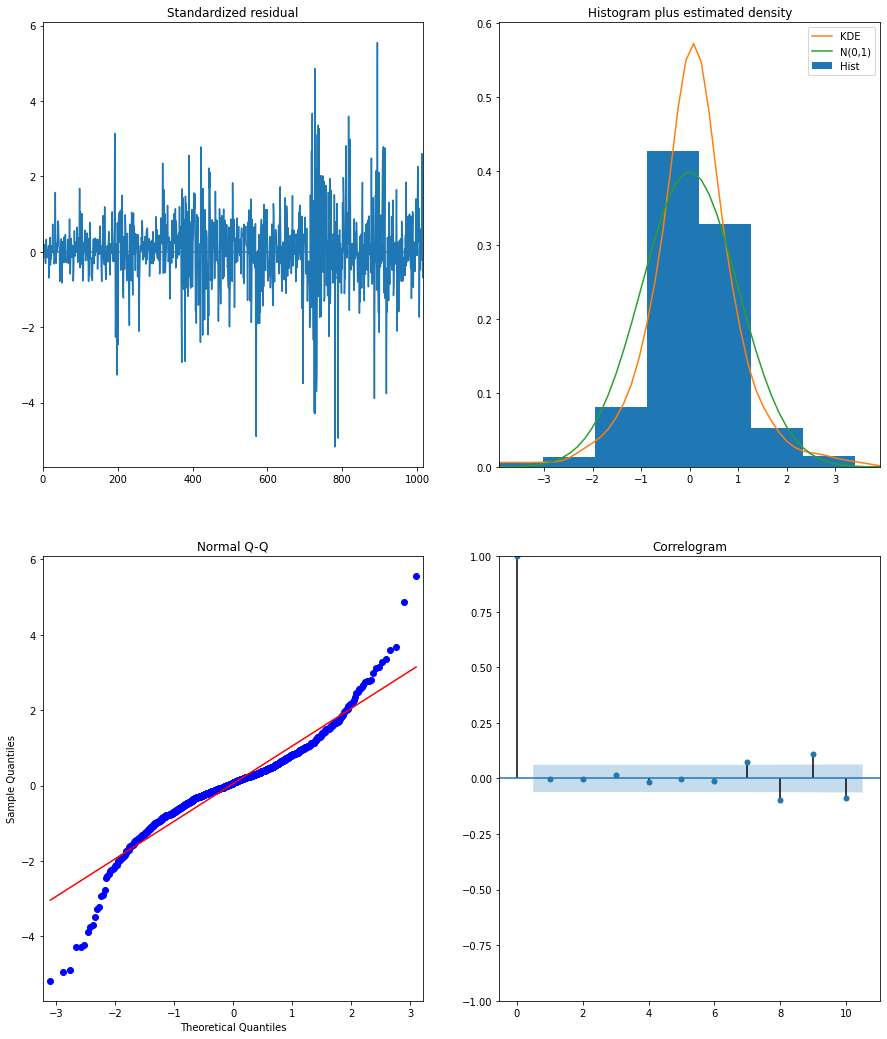

In [38]:
#dynamic forecasting
history_type = adj_close #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2020-06-05'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

##### Dynamic Forecasting Plot


In [39]:
def prediction_vis(pred_dynamic,pred_dynamic_conf,train, one_adj_c,test):
    plt.figure(figsize=(12,6))
    # Plot observed values

    #ax = train['Adj Close']['2019':].plot(label='observed')
    ax = train[one_adj_c]['2019':].plot(label='observed')#
    #test['Adj Close']['2019':].plot()#label='Test'
    test[one_adj_c]['2019':].plot()#label='Test'
    # Plot predicted values
    pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=0.9)

    # Plot the range for confidence intervals
    ax.fill_between(pred_dynamic_conf.index,
                    pred_dynamic_conf.iloc[:, 0],
                    pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.5)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Sale Price')
    plt.legend()

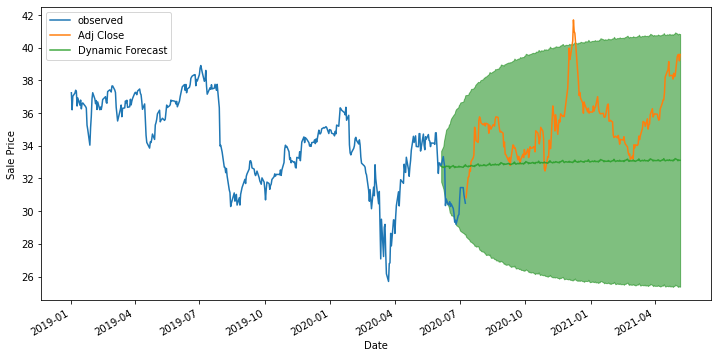

In [40]:
prediction_visual_1 = prediction_vis(pred_dynamic=pred_dynamic,pred_dynamic_conf=pred_dynamic_conf,
                                     train=train,test=test, one_adj_c= adj_close)#'Adj Close'

##### Metrics Function for Dynamic Forecasting

In [41]:
def metric_func_dynamic(pred_dynamic, test, sarima_col):
    # Get the real and predicted values
    forecast = pred_dynamic.predicted_mean
    actual = test[sarima_col]#['1996':] #history_type

    # Compute the mean square error
    mse = ((forecast - actual) ** 2).mean()
    print('The Mean Squared Error of the forecast is {}'.format(round(mse, 2)))
    #np.sqrt(np.mean((predictions-targets)**2))
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))
    print('The Root Mean Squared Error of the forecast is {}'.format(round(rmse, 2)))
    
    return mse, rmse
    

In [42]:
dyn_mse_adj,dyn_rmse_adj,  = metric_func_dynamic(pred_dynamic, test, sarima_col =adj_close)

The Mean Squared Error of the forecast is 9.1
The Root Mean Squared Error of the forecast is 3.02


In [43]:
dyn_rmse_adj

3.01667538723533

#### Pfizer / One-Step / MA_50
The model performed well in making predictions. The green line follows closely the orange line.  I applied the RMSE to the model and the result was 0.02.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                MA_50   No. Observations:                 1045
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                2636.749
Date:                              Mon, 10 May 2021   AIC                          -5265.498
Time:                                      09:43:33   BIC                          -5245.788
Sample:                                           0   HQIC                         -5258.014
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9245      0.011    178.053      0.000       1.903       1.946
ar.L2         -0.9309      0.011    -85.814      0.000      -0.952      -0.910
ma.S.L12       9.4527      2.463      3.837      0.000       4.625      14.281
sigma2      3.742e-06   2.05e-06      1.825      0.068   -2.78e-07    7.76e-06
===================================================================================
Ljung-Box (Q):                      366.38   Jarque-Bera (JB):               152.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


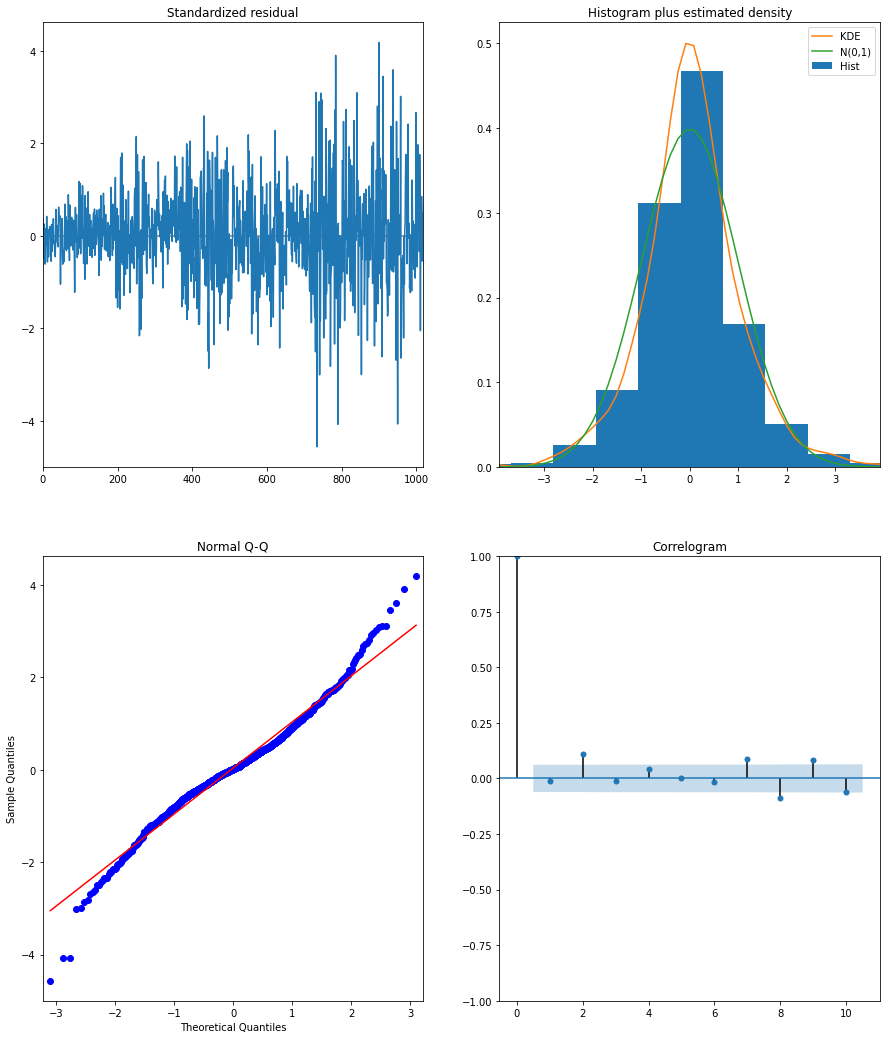

In [44]:
hist_type = ma_50 
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2020-06-05'), dynamic=False)
pred_conf = pred.conf_int()

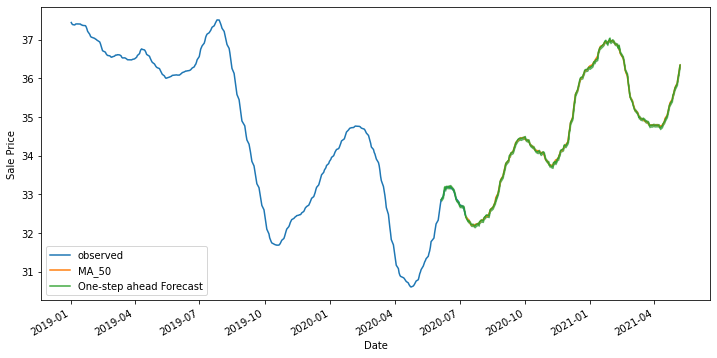

In [45]:
one_step_forecast_1 = one_step(train=train, test=test, one_adj_c= ma_50, pred=pred,pred_conf=pred_conf)

In [46]:
metric_func_1 = metric_func_one(pred, test, ma_50)

The Mean Squared Error of our forecasts is 0.0
The Root Mean Squared Error of our forecasts is 0.02


In [47]:
test['MA_50']

Date
2020-07-10    32.408542
2020-07-13    32.358044
2020-07-14    32.320900
2020-07-15    32.293044
2020-07-16    32.246946
                ...    
2021-05-03    35.873521
2021-05-04    35.986210
2021-05-05    36.106228
2021-05-06    36.221614
2021-05-07    36.343414
Name: MA_50, Length: 209, dtype: float64

#### Pfizer/ Dynamic / MA_50
The model doesn't appear to have performed as well with this column. The model's green line fluctuates betwee 36 and 33 but after 12/20 is predicting 34.  However, when evaluating the model's performane the predictions were off 1.72 so it still performed pretty well. 

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                MA_50   No. Observations:                 1045
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                2636.749
Date:                              Mon, 10 May 2021   AIC                          -5265.498
Time:                                      09:43:42   BIC                          -5245.788
Sample:                                           0   HQIC                         -5258.014
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9245      0.011    178.053      0.000       1.903       1.946
ar.L2         -0.9309      0.011    -85.814      0.000      -0.952      -0.910
ma.S.L12       9.4527      2.463      3.837      0.000       4.625      14.281
sigma2      3.742e-06   2.05e-06      1.825      0.068   -2.78e-07    7.76e-06
===================================================================================
Ljung-Box (Q):                      366.38   Jarque-Bera (JB):               152.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


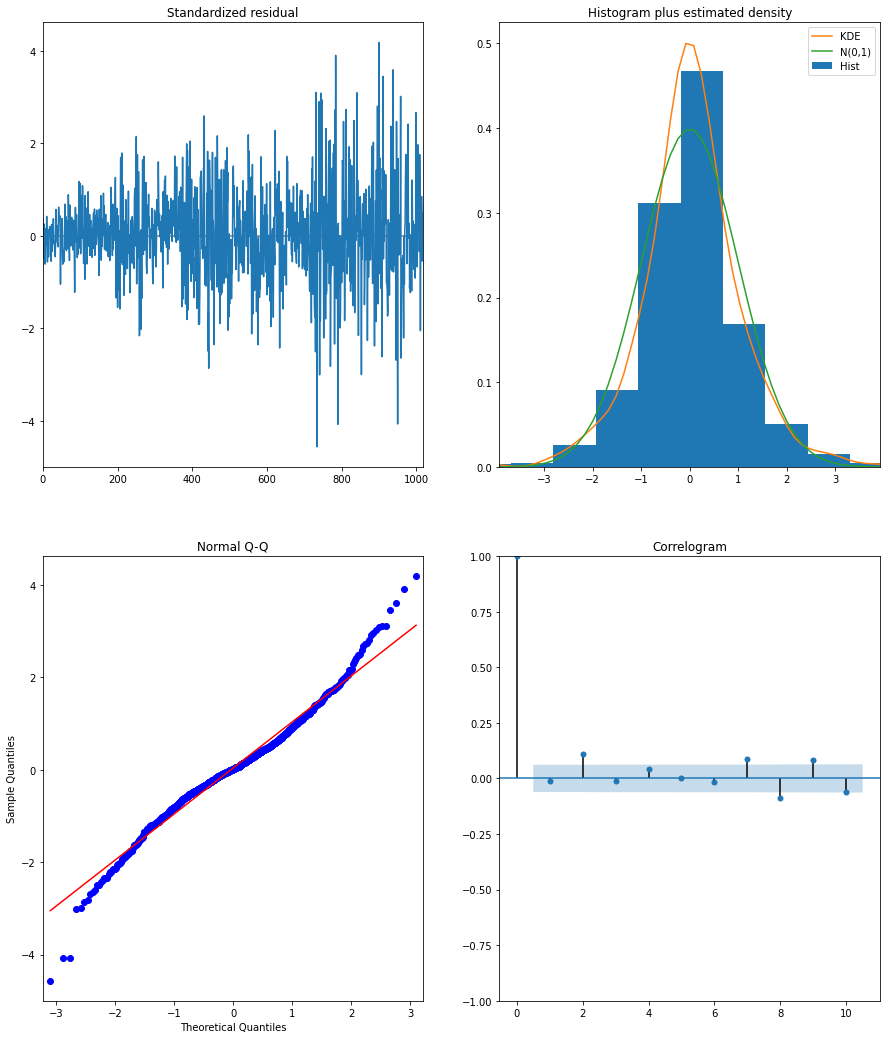

In [48]:
history_type = ma_50 #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2020-06-05'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

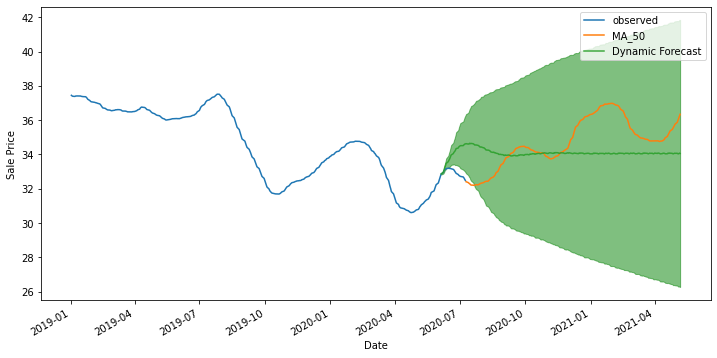

In [49]:
prediction_visual_1 = prediction_vis(pred_dynamic=pred_dynamic,pred_dynamic_conf=pred_dynamic_conf,
                                     train=train,test=test,one_adj_c= 'MA_50')

In [50]:
metric_func_dynamic(pred_dynamic, test, ma_50)

The Mean Squared Error of the forecast is 2.47
The Root Mean Squared Error of the forecast is 1.57


(2.473592141710989, 1.5727657618701487)

#### Pfizer / Actual_Changes
The model's predictions are centered around 0. The confidence intervals indicate there's a quite a range of values in the test set.  The model's performance was 0.54.


/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Actual_Changes   No. Observations:                 1045
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 12)   Log Likelihood                -717.745
Date:                              Mon, 10 May 2021   AIC                           1449.489
Time:                                      09:43:50   BIC                           1483.961
Sample:                                           0   HQIC                          1462.580
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8762      0.046    -19.181      0.000      -0.966      -0.787
ma.L1          0.8251      0.049     17.005      0.000       0.730       0.920
ma.L2         -0.0074      0.028     -0.260      0.795      -0.063       0.048
ma.L3          0.0920      0.023      4.045      0.000       0.047       0.137
ar.S.L12       0.0471      0.028      1.677      0.094      -0.008       0.102
ma.S.L12      -1.0000     74.684     -0.013      0.989    -147.378     145.378
sigma2         0.2279     17.019      0.013      0.989     -33.128      33.584
===================================================================================
Ljung-Box (Q):                       66.74   Jarque-Bera (JB):              1017.30
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               4.76   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


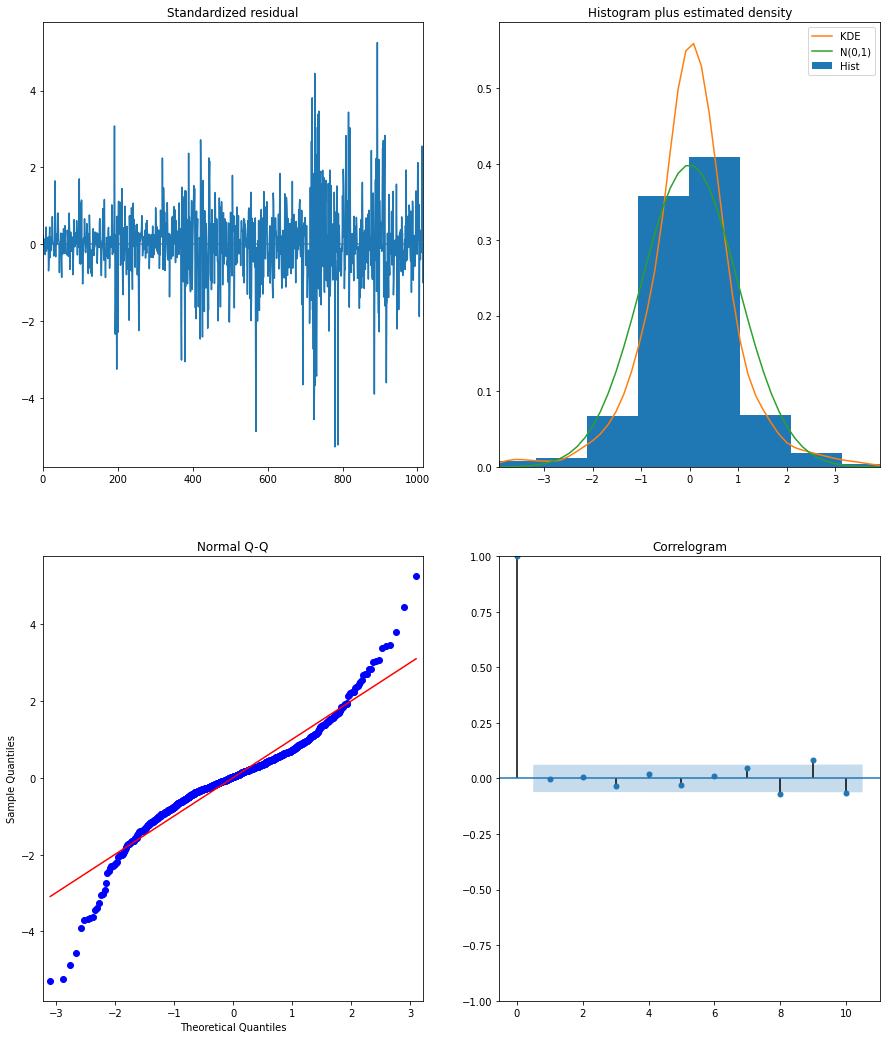

In [51]:
hist_type = actual_changes  #hist_type = 'Adj Close'
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2020-06-05'), dynamic=False)
pred_conf = pred.conf_int()

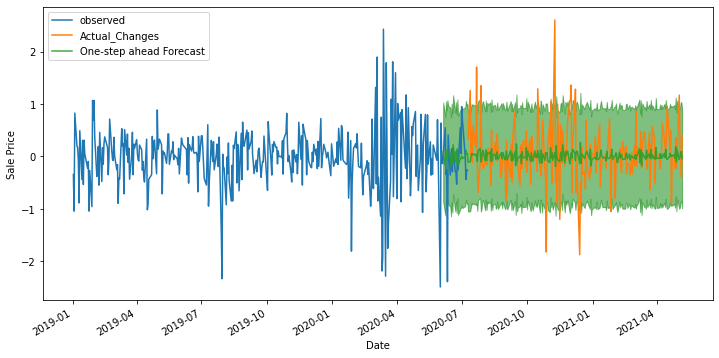

In [52]:
one_step_forecast_2 = one_step(train=train, test=test, one_adj_c= actual_changes, pred=pred,pred_conf=pred_conf)

In [53]:
metric_func_2 = metric_func_one(pred, test, actual_changes)

The Mean Squared Error of our forecasts is 0.28
The Root Mean Squared Error of our forecasts is 0.53


Regarding Dynamic Forecasting, the model's predictions were centered around 0. The confidence intervals have a large rang in possible values. 

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Actual_Changes   No. Observations:                 1045
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 12)   Log Likelihood                -717.745
Date:                              Mon, 10 May 2021   AIC                           1449.489
Time:                                      09:43:58   BIC                           1483.961
Sample:                                           0   HQIC                          1462.580
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8762      0.046    -19.181      0.000      -0.966      -0.787
ma.L1          0.8251      0.049     17.005      0.000       0.730       0.920
ma.L2         -0.0074      0.028     -0.260      0.795      -0.063       0.048
ma.L3          0.0920      0.023      4.045      0.000       0.047       0.137
ar.S.L12       0.0471      0.028      1.677      0.094      -0.008       0.102
ma.S.L12      -1.0000     74.684     -0.013      0.989    -147.378     145.378
sigma2         0.2279     17.019      0.013      0.989     -33.128      33.584
===================================================================================
Ljung-Box (Q):                       66.74   Jarque-Bera (JB):              1017.30
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               4.76   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


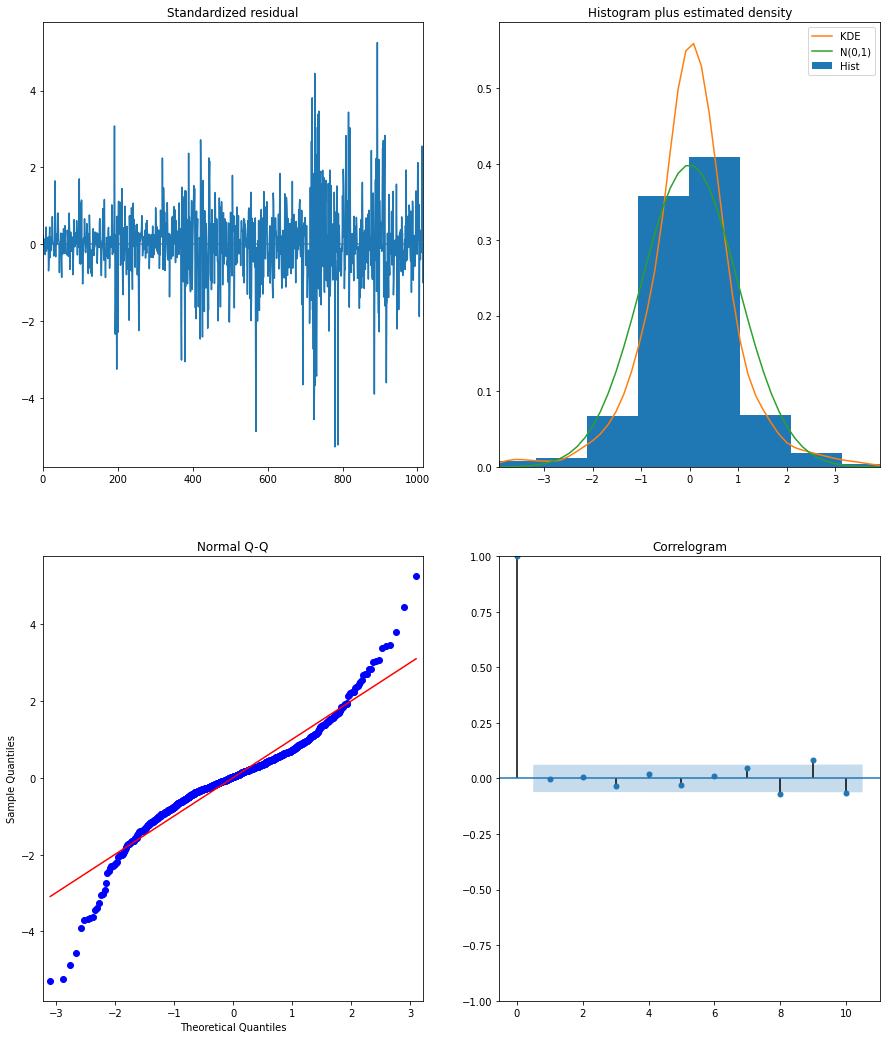

In [54]:
history_type = actual_changes  #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2020-06-05'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

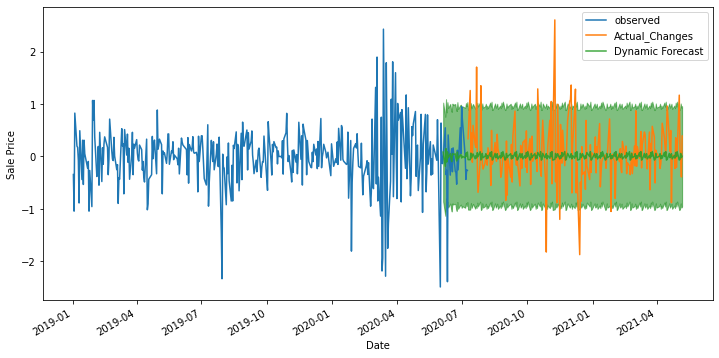

In [55]:
prediction_visual_3 = prediction_vis(pred_dynamic=pred_dynamic,pred_dynamic_conf=pred_dynamic_conf,
                                     train=train,test=test,one_adj_c= actual_changes)


In [56]:
metric_func_dynamic(pred_dynamic, test, actual_changes)

The Mean Squared Error of the forecast is 0.28
The Root Mean Squared Error of the forecast is 0.53


(0.2835864636258046, 0.5325283688460217)

#### BNTX 

Dataframe has 398 rows and 6 columns



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-10,16.698999,13.010000,16.500000,14.240000,2805800,14.240000
2019-10-11,15.340000,13.500000,15.340000,13.820000,1364300,13.820000
2019-10-14,13.910000,12.525000,13.830000,12.750000,899100,12.750000
2019-10-15,13.000000,12.530000,12.990000,12.920000,484700,12.920000
2019-10-16,13.880000,12.610000,13.200000,12.940000,524200,12.940000
...,...,...,...,...,...,...
2021-05-04,213.149994,169.300003,212.500000,176.880005,12101100,176.880005
2021-05-05,196.076004,161.220001,185.410004,170.770004,9146800,170.770004
2021-05-06,171.889999,145.000000,146.059998,168.000000,9970500,168.000000


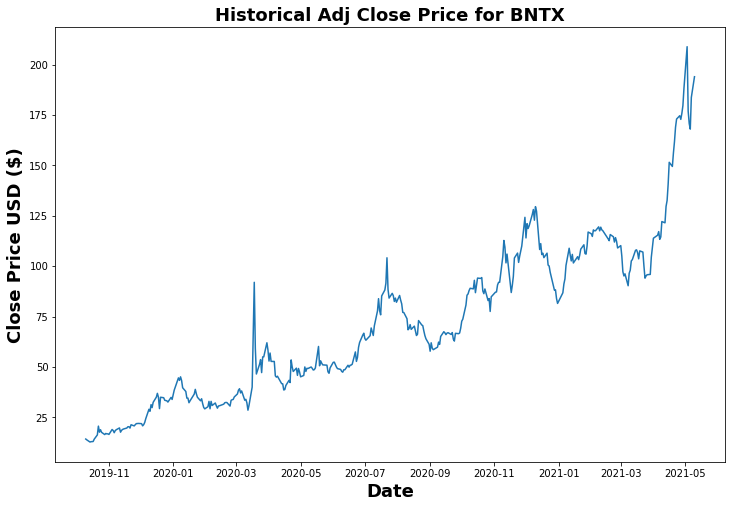

In [57]:
start='01-01-2017'
end='today'
bntx_stock = single_stock_data('BNTX', start= start,end='today',plot=True,stock_value='Adj Close')
bntx_stock

In [58]:
bntx_stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,398.000000,398.000000,398.000000,398.000000,3.980000e+02,398.000000
mean,73.748400,68.666465,71.616163,71.266583,2.117627e+06,71.266583
std,39.750909,37.342502,38.585233,38.710893,2.338720e+06,38.710893
min,13.000000,12.525000,12.990000,12.750000,2.390000e+04,12.750000
25%,40.959000,36.637499,38.519999,38.632502,4.057250e+05,38.632502
50%,68.345001,64.100002,66.605000,66.195000,1.511150e+06,66.195000
75%,104.540003,97.207500,100.000000,100.517498,2.895600e+06,100.517498
max,213.149994,196.000000,212.500000,208.899994,1.589970e+07,208.899994


In [59]:
bntx_df = delta_data(bntx_stock,col='Adj Close')
train = bntx_df[:int(0.8*(len(bntx_df)))]
test = bntx_df[int(0.8*(len(bntx_df))):]

In [60]:
train

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,,,,
2019-12-19,33.869999,27.728001,33.869999,29.340000,250500,29.340000,-5.660000,-0.161714,20.794800
2019-12-20,34.970001,31.809999,31.809999,34.970001,447900,34.970001,5.630001,0.191888,21.209400
2019-12-23,35.900002,33.099998,34.910000,34.730000,103500,34.730000,-0.240002,-0.006863,21.627600
2019-12-24,34.610001,33.009998,34.610001,33.470001,23900,33.470001,-1.259998,-0.036280,22.042000
2019-12-26,34.000000,31.591000,33.290001,33.200001,53900,33.200001,-0.270000,-0.008067,22.447600
...,...,...,...,...,...,...,...,...,...
2021-01-22,108.480003,104.315002,104.500000,108.440002,1696300,108.440002,3.010002,0.028550,104.765799
2021-01-25,110.980003,105.139999,108.000000,110.610001,2882600,110.610001,2.169998,0.020011,104.722799
2021-01-26,112.832001,105.489998,110.279999,106.290001,3863900,106.290001,-4.320000,-0.039056,104.659599


In [61]:
test

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,,,,
2021-01-29,118.169998,111.400002,114.940002,116.940002,6622800,116.940002,6.940002,0.063091,105.334800
2021-02-01,119.540001,113.489998,117.849998,116.099998,2898200,116.099998,-0.840004,-0.007183,105.918200
2021-02-02,115.879997,110.559998,115.000000,114.760002,1906700,114.760002,-1.339996,-0.011542,106.404600
2021-02-03,119.250000,113.709999,114.209999,118.019997,2426900,118.019997,3.259995,0.028407,106.866400
2021-02-04,120.088997,116.989998,117.900002,117.559998,1441700,117.559998,-0.459999,-0.003898,107.136199
...,...,...,...,...,...,...,...,...,...
2021-05-04,213.149994,169.300003,212.500000,176.880005,12101100,176.880005,-32.019989,-0.153279,124.723400
2021-05-05,196.076004,161.220001,185.410004,170.770004,9146800,170.770004,-6.110001,-0.034543,125.899400
2021-05-06,171.889999,145.000000,146.059998,168.000000,9970500,168.000000,-2.770004,-0.016221,126.976000


#### BNTX / Adj Close
##### BNTX / One-Step Ahead
The green line follows the orange line closely.  The model's performance was 3.91. 

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                  349
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1020.014
Date:                              Mon, 10 May 2021   AIC                           2052.028
Time:                                      09:44:03   BIC                           2074.676
Sample:                                           0   HQIC                          2061.070
                                              - 349                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0259      0.036     28.572      0.000       0.956       1.096
ar.L2         -0.1387      0.075     -1.852      0.064      -0.286       0.008
ar.L3          0.1146      0.047      2.414      0.016       0.022       0.208
ar.S.L12      -0.0002      0.064     -0.004      0.997      -0.126       0.126
ma.S.L12      -0.9511      0.059    -16.241      0.000      -1.066      -0.836
sigma2        31.0678      1.561     19.898      0.000      28.008      34.128
===================================================================================
Ljung-Box (Q):                       26.52   Jarque-Bera (JB):               890.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.56
Prob(H) (two-sided):                  0.16   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


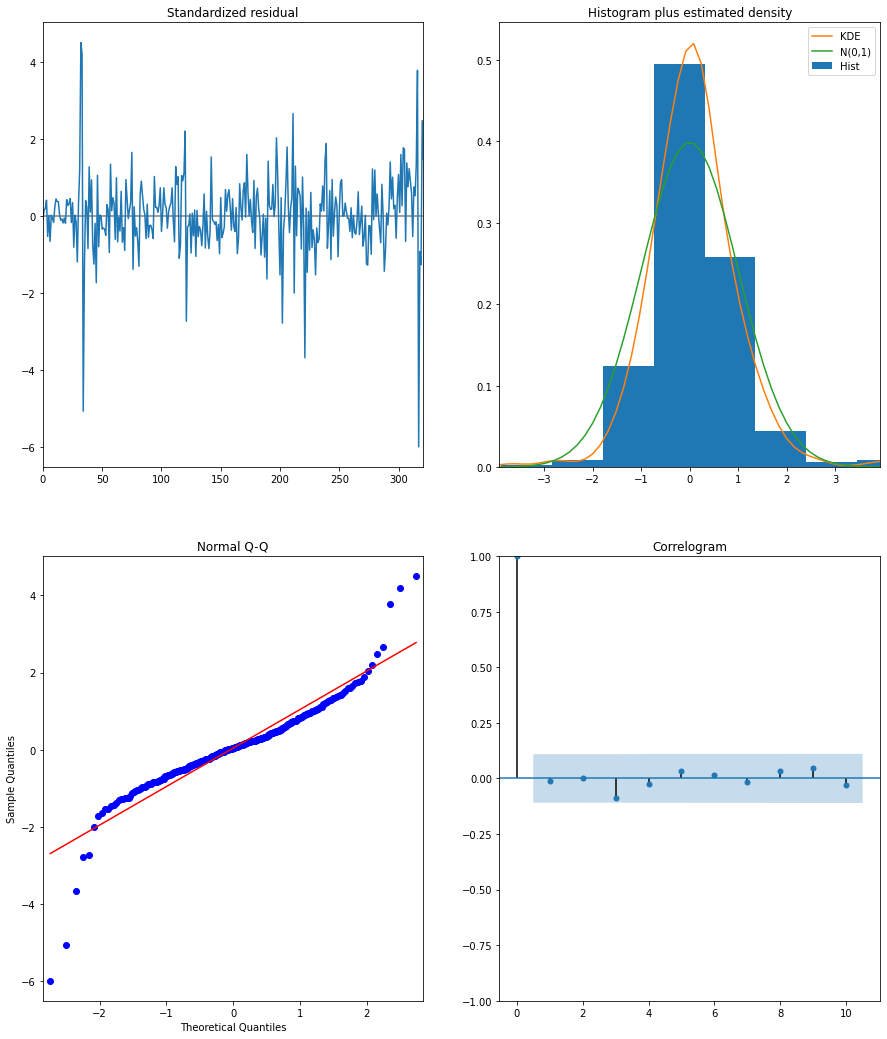

In [62]:
hist_type = adj_close #hist_type = 'Adj Close'
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(bntx_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=False)
pred_conf = pred.conf_int()

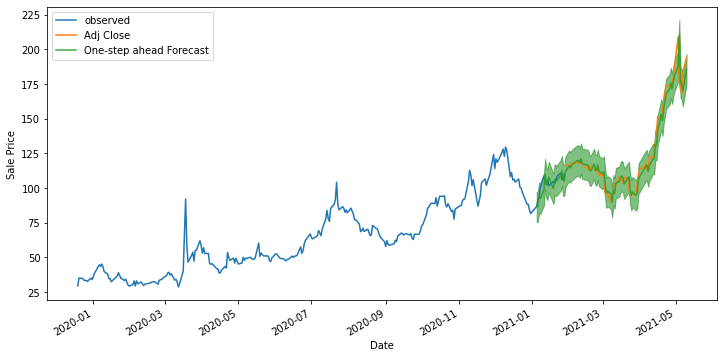

In [63]:
#blue actual
#green line is forecast
#orange-test 
#green shade confidence interval
one_step_forecast_4 = one_step(train=train, test=test, one_adj_c= adj_close, pred=pred,pred_conf=pred_conf)

In [64]:

metric_func_one(pred, test, sarima_col= adj_close)

The Mean Squared Error of our forecasts is 44.0
The Root Mean Squared Error of our forecasts is 6.63


(44.002804916306985, 6.633461005863152)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                  349
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1020.014
Date:                              Mon, 10 May 2021   AIC                           2052.028
Time:                                      09:44:06   BIC                           2074.676
Sample:                                           0   HQIC                          2061.070
                                              - 349                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0259      0.036     28.572      0.000       0.956       1.096
ar.L2         -0.1387      0.075     -1.852      0.064      -0.286       0.008
ar.L3          0.1146      0.047      2.414      0.016       0.022       0.208
ar.S.L12      -0.0002      0.064     -0.004      0.997      -0.126       0.126
ma.S.L12      -0.9511      0.059    -16.241      0.000      -1.066      -0.836
sigma2        31.0678      1.561     19.898      0.000      28.008      34.128
===================================================================================
Ljung-Box (Q):                       26.52   Jarque-Bera (JB):               890.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.56
Prob(H) (two-sided):                  0.16   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


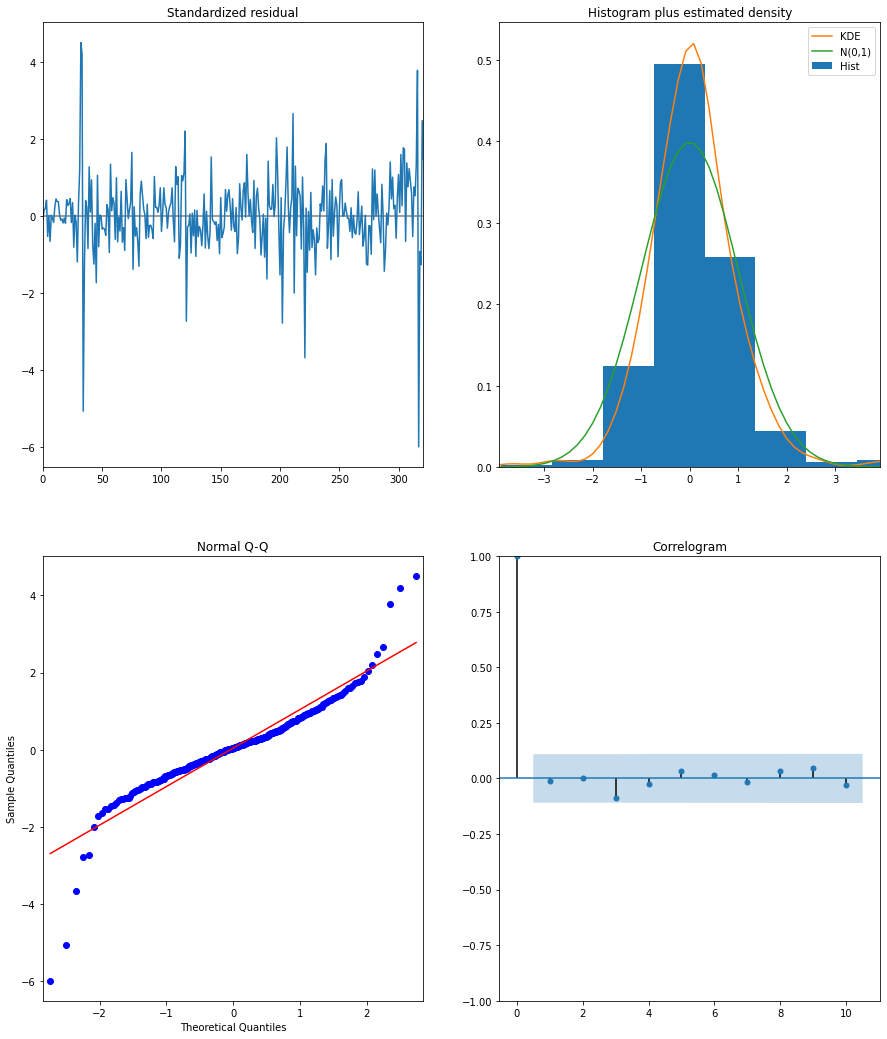

In [65]:
history_type = adj_close #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(bntx_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

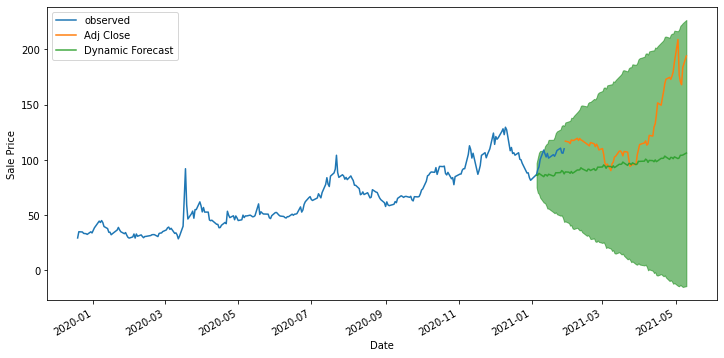

In [66]:
#gren line is forcast
#green shades gives more range for forecast
#one_adj_c = 'Adj Close'
# prediction_visual_3 = prediction_vis(pred_dynamic,pred_dynamic_conf,train, one_adj_c,test)
# prediction_visual_3
prediction_visual_4 = prediction_vis(pred_dynamic=pred_dynamic,pred_dynamic_conf=pred_dynamic_conf,
                                     train=train,test=test,one_adj_c= adj_close)


In [67]:
metric_func_dynamic(pred_dynamic, test, adj_close)

The Mean Squared Error of the forecast is 1577.08
The Root Mean Squared Error of the forecast is 39.71


(1577.0763002483122, 39.71241997471713)

#### BNTX / MA_50

In [68]:
bntx_stock['MA_50'].describe()

count    349.000000
mean      69.629799
std       29.553887
min       20.794800
25%       44.012600
50%       70.276200
75%      101.725999
max      130.103000
Name: MA_50, dtype: float64

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                MA_50   No. Observations:                 1045
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                2636.749
Date:                              Mon, 10 May 2021   AIC                          -5265.498
Time:                                      09:44:10   BIC                          -5245.788
Sample:                                           0   HQIC                         -5258.014
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9245      0.011    178.053      0.000       1.903       1.946
ar.L2         -0.9309      0.011    -85.814      0.000      -0.952      -0.910
ma.S.L12       9.4527      2.463      3.837      0.000       4.625      14.281
sigma2      3.742e-06   2.05e-06      1.825      0.068   -2.78e-07    7.76e-06
===================================================================================
Ljung-Box (Q):                      366.38   Jarque-Bera (JB):               152.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


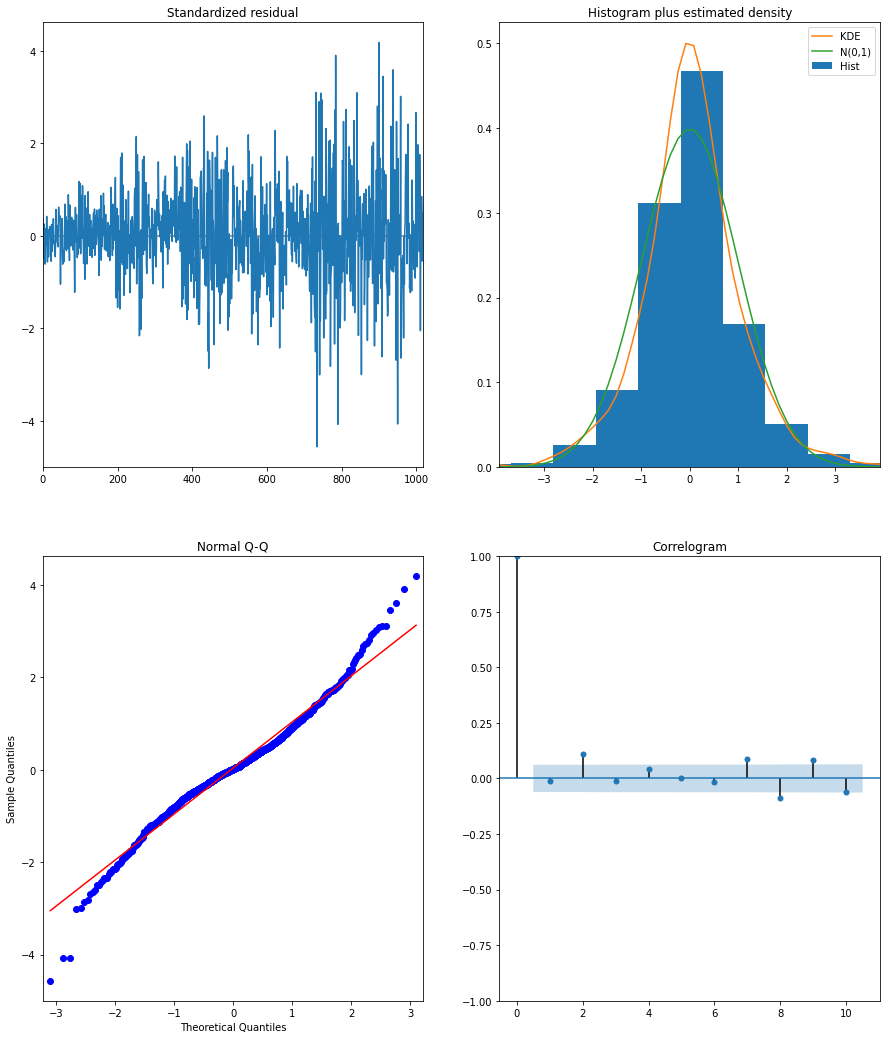

In [69]:
#check
hist_type = ma_50  #hist_type = 'Adj Close'
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=False)
pred_conf = pred.conf_int()

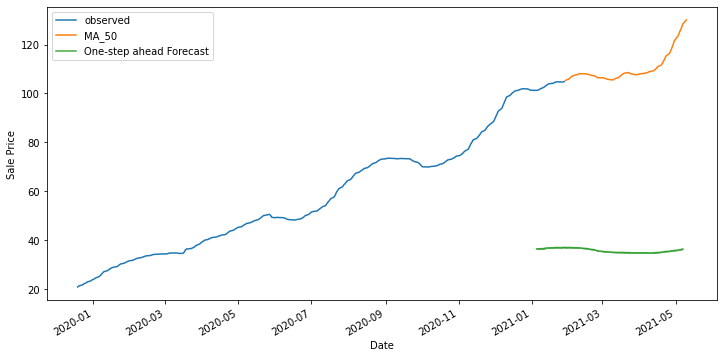

In [70]:
one_step_forecast_5 = one_step(train=train, test=test, one_adj_c= 'MA_50', pred=pred,pred_conf=pred_conf)#'MA_50'


In [71]:
metric_func_one(pred, test, ma_50)

The Mean Squared Error of our forecasts is 5589.65
The Root Mean Squared Error of our forecasts is 74.76


(5589.650314018758, 74.76396400685799)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                MA_50   No. Observations:                  349
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  60.696
Date:                              Mon, 10 May 2021   AIC                           -113.392
Time:                                      09:44:13   BIC                            -98.269
Sample:                                           0   HQIC                          -107.356
                                              - 349                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8915      0.021     90.490      0.000       1.851       1.932
ar.L2         -0.8959      0.021    -42.029      0.000      -0.938      -0.854
ma.S.L12      49.5915   2.02e-07   2.46e+08      0.000      49.592      49.592
sigma2      1.593e-05   1.08e-06     14.698      0.000    1.38e-05    1.81e-05
===================================================================================
Ljung-Box (Q):                      189.47   Jarque-Bera (JB):                12.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.08
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""



MODEL DIAGNOSTICS


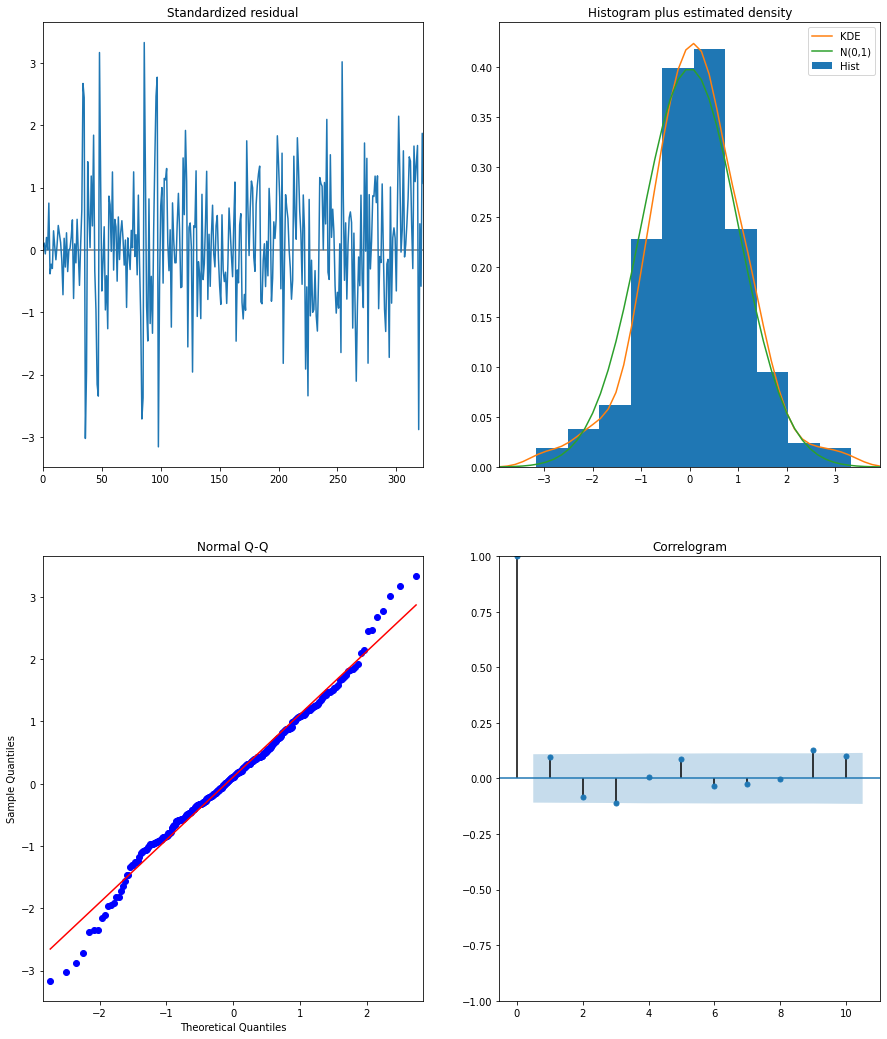

In [72]:
history_type = ma_50 #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(bntx_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

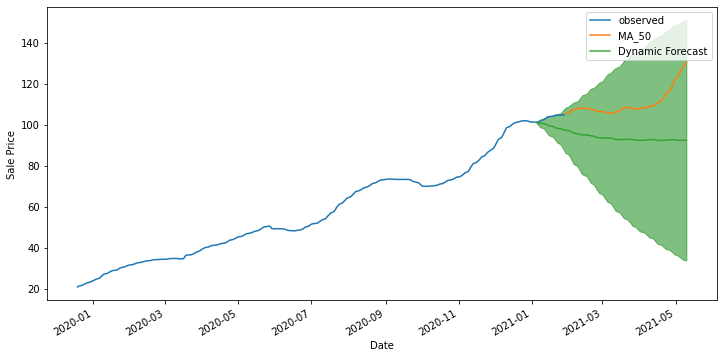

In [73]:
prediction_visual_5 = prediction_vis(pred_dynamic=pred_dynamic,pred_dynamic_conf=pred_dynamic_conf,
                                     train=train,test=test,one_adj_c= ma_50)


In [74]:
metric_func_dynamic(pred_dynamic, test, ma_50)

The Mean Squared Error of the forecast is 331.15
The Root Mean Squared Error of the forecast is 18.2


(331.14867157095216, 18.19749080425519)

#### BNTX / actual_changes

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Actual_Changes   No. Observations:                 1045
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 12)   Log Likelihood                -717.745
Date:                              Mon, 10 May 2021   AIC                           1449.489
Time:                                      09:44:20   BIC                           1483.961
Sample:                                           0   HQIC                          1462.580
                                             - 1045                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8762      0.046    -19.181      0.000      -0.966      -0.787
ma.L1          0.8251      0.049     17.005      0.000       0.730       0.920
ma.L2         -0.0074      0.028     -0.260      0.795      -0.063       0.048
ma.L3          0.0920      0.023      4.045      0.000       0.047       0.137
ar.S.L12       0.0471      0.028      1.677      0.094      -0.008       0.102
ma.S.L12      -1.0000     74.684     -0.013      0.989    -147.378     145.378
sigma2         0.2279     17.019      0.013      0.989     -33.128      33.584
===================================================================================
Ljung-Box (Q):                       66.74   Jarque-Bera (JB):              1017.30
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               4.76   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


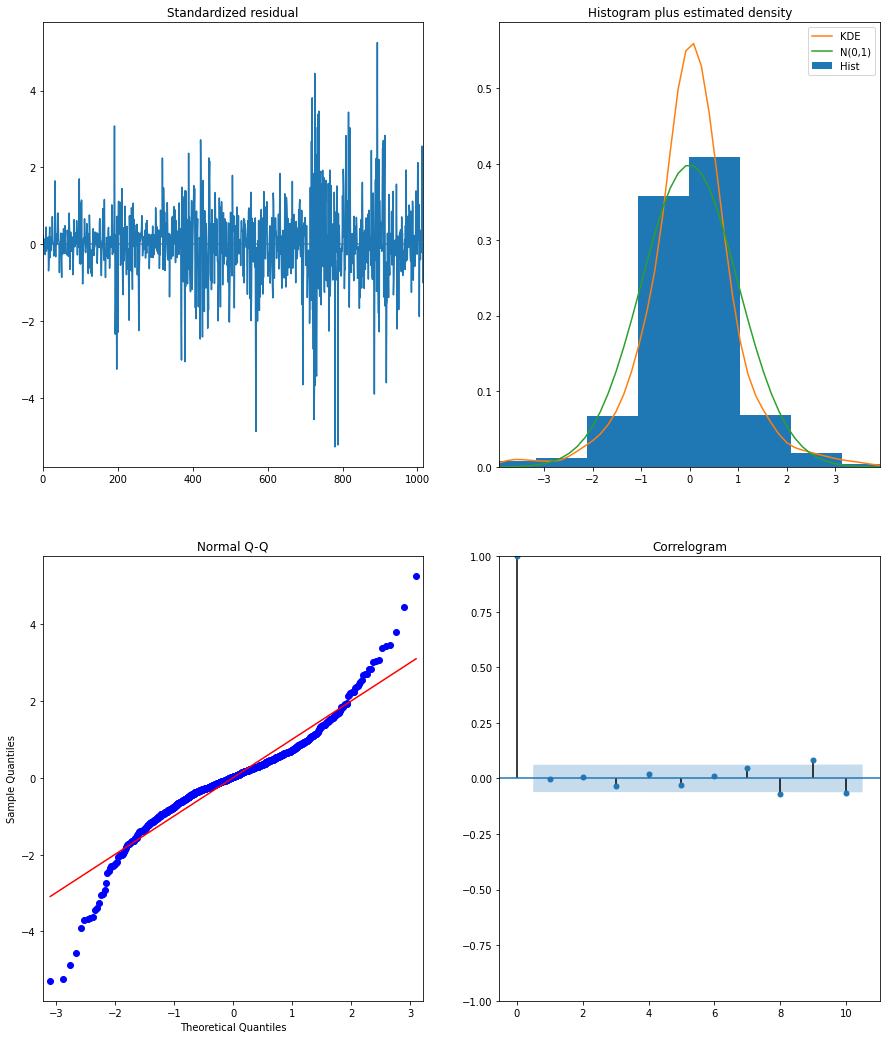

In [75]:
hist_type = actual_changes  
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(sarima_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=False)
pred_conf = pred.conf_int()

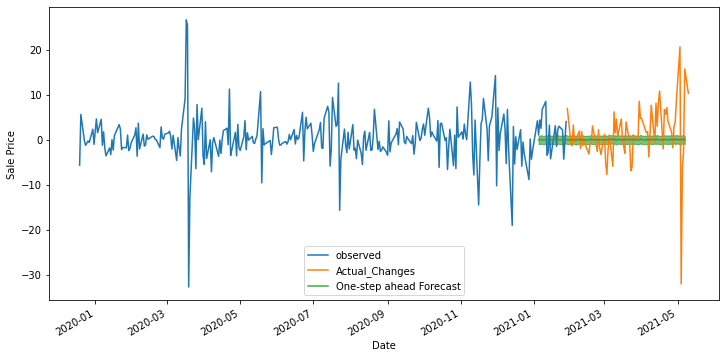

In [76]:
one_step_forecast_5 = one_step(train=train, test=test, one_adj_c= actual_changes, pred=pred,pred_conf=pred_conf)#'MA_50'


In [77]:
metric_func_one(pred, test, actual_changes)

The Mean Squared Error of our forecasts is 42.1
The Root Mean Squared Error of our forecasts is 6.49


(42.10149064430535, 6.48856614702396)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Actual_Changes   No. Observations:                  349
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 12)   Log Likelihood               -1016.357
Date:                              Mon, 10 May 2021   AIC                           2046.714
Time:                                      09:44:23   BIC                           2073.114
Sample:                                           0   HQIC                          2057.255
                                              - 349                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0326      0.712      0.046      0.963      -1.363       1.429
ma.L1         -0.0167      0.718     -0.023      0.981      -1.423       1.390
ma.L2         -0.1052      0.052     -2.033      0.042      -0.207      -0.004
ma.L3         -0.0758      0.083     -0.910      0.363      -0.239       0.087
ar.S.L12      -0.0002      0.062     -0.003      0.997      -0.122       0.122
ma.S.L12      -0.9521      0.061    -15.529      0.000      -1.072      -0.832
sigma2        30.9490      1.664     18.594      0.000      27.687      34.211
===================================================================================
Ljung-Box (Q):                       24.89   Jarque-Bera (JB):               818.27
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.51
Prob(H) (two-sided):                  0.13   Kurtosis:                        10.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


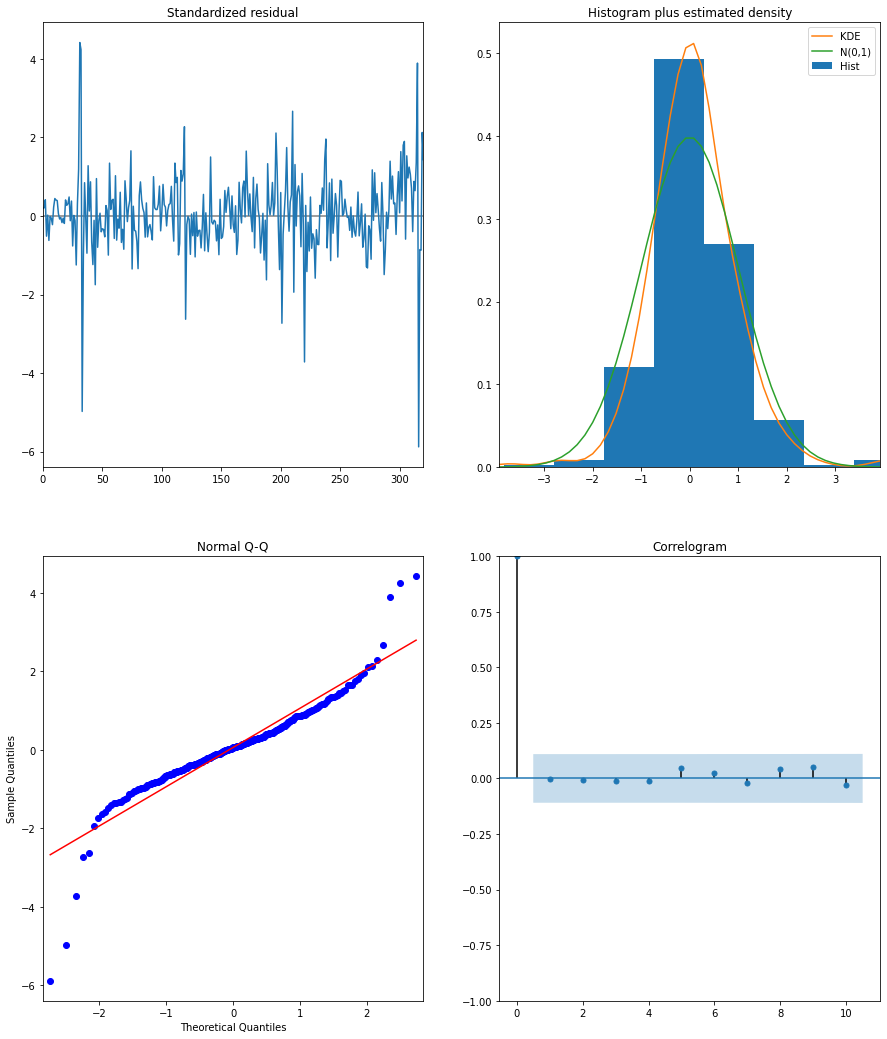

In [78]:
history_type = actual_changes #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(bntx_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

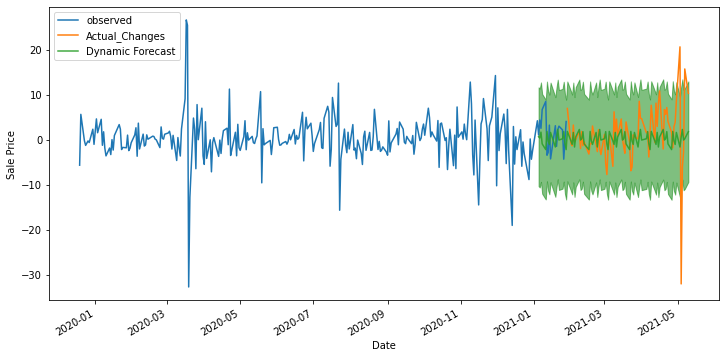

In [79]:
prediction_visual_5 = prediction_vis(pred_dynamic=pred_dynamic,pred_dynamic_conf=pred_dynamic_conf,
                                     train=train,test=test,one_adj_c= actual_changes)


In [80]:
metric_func_dynamic(pred_dynamic, test, actual_changes)

The Mean Squared Error of the forecast is 44.96
The Root Mean Squared Error of the forecast is 6.7


(44.95636503899191, 6.704950785724822)

 #### NVAX / Adj Close

Dataframe has 392 rows and 6 columns



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-10,16.698999,13.010000,16.500000,14.240000,2805800,14.240000
2019-10-11,15.340000,13.500000,15.340000,13.820000,1364300,13.820000
2019-10-14,13.910000,12.525000,13.830000,12.750000,899100,12.750000
2019-10-15,13.000000,12.530000,12.990000,12.920000,484700,12.920000
2019-10-16,13.880000,12.610000,13.200000,12.940000,524200,12.940000
...,...,...,...,...,...,...
2021-04-26,174.770004,161.539993,167.791000,174.649994,3087500,174.649994
2021-04-27,175.880005,169.264008,173.369995,172.839996,2061900,172.839996
2021-04-28,177.190002,169.300003,171.979996,175.770004,1507200,175.770004


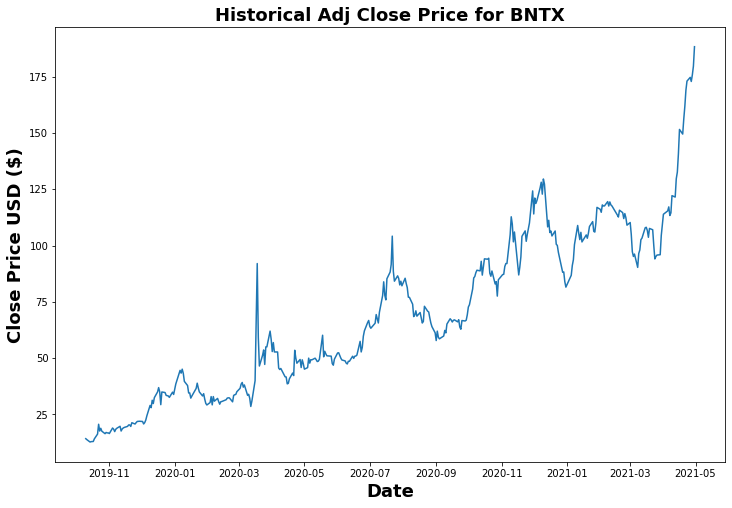

In [81]:
start='01-01-2017'
end='04-30-2021'
nvax_stock = single_stock_data('BNTX', start= start,end=end,plot=True,stock_value='Adj Close')
nvax_stock

In [82]:
nvax_df = delta_data(nvax_stock,col='Adj Close')
train = nvax_df[:int(0.8*(len(nvax_df)))]
test = nvax_df[int(0.8*(len(nvax_df))):]

In [83]:
train

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
Date,,,,,,,,,
2019-12-19,33.869999,27.728001,33.869999,29.340000,250500,29.340000,-5.660000,-0.161714,20.794800
2019-12-20,34.970001,31.809999,31.809999,34.970001,447900,34.970001,5.630001,0.191888,21.209400
2019-12-23,35.900002,33.099998,34.910000,34.730000,103500,34.730000,-0.240002,-0.006863,21.627600
2019-12-24,34.610001,33.009998,34.610001,33.470001,23900,33.470001,-1.259998,-0.036280,22.042000
2019-12-26,34.000000,31.591000,33.290001,33.200001,53900,33.200001,-0.270000,-0.008067,22.447600
...,...,...,...,...,...,...,...,...,...
2021-01-14,106.500000,102.260002,102.790001,105.849998,1910200,105.849998,3.239998,0.031576,103.632200
2021-01-15,104.989998,97.250000,104.250000,101.589996,3151600,101.589996,-4.260002,-0.040246,103.919599
2021-01-19,105.440002,100.199997,101.260002,104.699997,2018200,104.699997,3.110001,0.030613,104.199799


In [84]:
nvax_df.describe()

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes,Percent_Chg,MA_50
count,343.000000,343.000000,343.000000,343.000000,3.430000e+02,343.000000,343.000000,343.000000,343.000000
mean,79.039155,73.836650,76.841609,76.534810,2.290860e+06,76.534810,0.446880,0.007548,68.633284
std,33.805048,32.372151,32.827298,33.375072,2.267844e+06,33.375072,4.957780,0.075272,28.822540
min,30.395000,27.728001,28.990000,28.549999,2.390000e+04,28.549999,-32.700001,-0.355435,20.794800
25%,50.240000,47.424999,49.449999,48.980000,8.600500e+05,48.980000,-2.010001,-0.028847,43.455500
50%,75.000000,68.209999,70.930000,70.489998,1.760000e+06,70.489998,0.209999,0.003852,70.056000
75%,105.750000,99.605000,102.814999,103.465000,3.054500e+06,103.465000,2.654999,0.039167,101.338299
max,193.850006,180.679993,183.300003,188.279999,1.589970e+07,188.279999,26.599998,0.665000,121.613600


/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                  349
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1020.014
Date:                              Mon, 10 May 2021   AIC                           2052.028
Time:                                      09:44:28   BIC                           2074.676
Sample:                                           0   HQIC                          2061.070
                                              - 349                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0259      0.036     28.572      0.000       0.956       1.096
ar.L2         -0.1387      0.075     -1.852      0.064      -0.286       0.008
ar.L3          0.1146      0.047      2.414      0.016       0.022       0.208
ar.S.L12      -0.0002      0.064     -0.004      0.997      -0.126       0.126
ma.S.L12      -0.9511      0.059    -16.241      0.000      -1.066      -0.836
sigma2        31.0678      1.561     19.898      0.000      28.008      34.128
===================================================================================
Ljung-Box (Q):                       26.52   Jarque-Bera (JB):               890.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.56
Prob(H) (two-sided):                  0.16   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


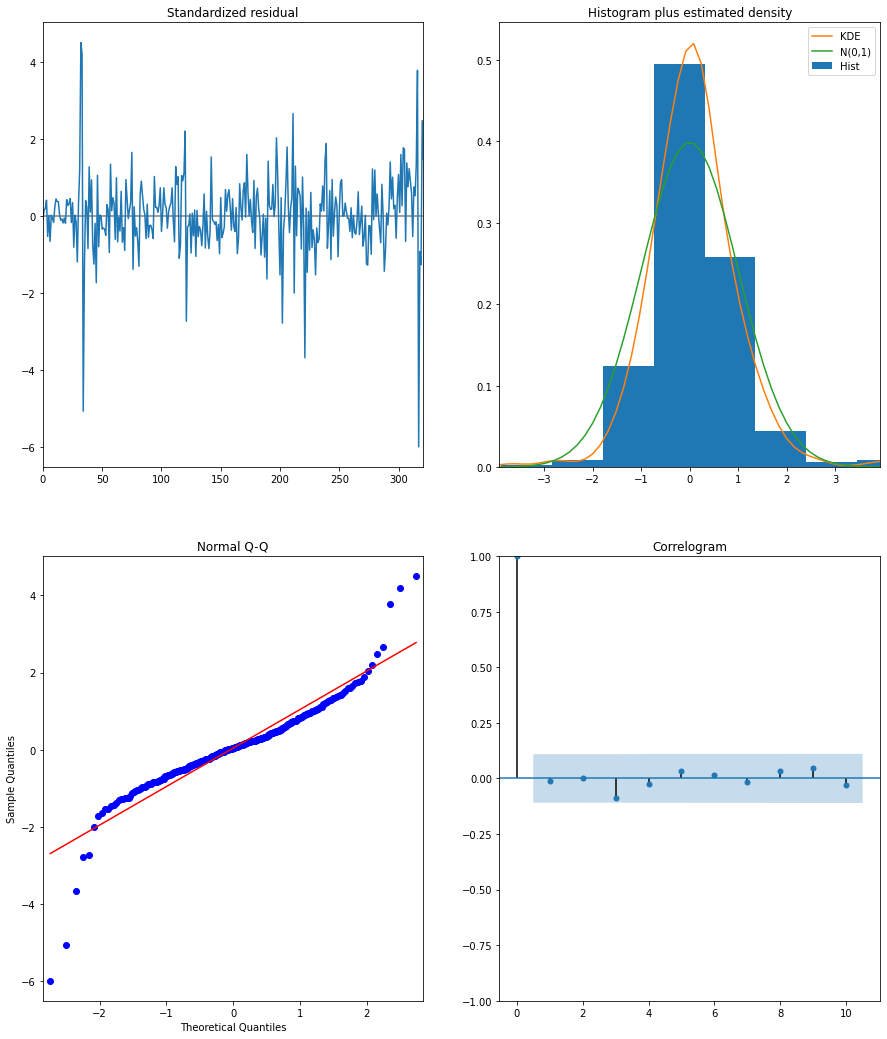

In [85]:
hist_type = adj_close #hist_type = 'Adj Close'
hist_params= output_df[output_df['hist']==hist_type]
hist_params.pdq.values[0]
hist_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(bntx_df[hist_type],order=hist_params.pdq.values[0], seasonal_order= hist_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 

pred = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=False)
pred_conf = pred.conf_int()

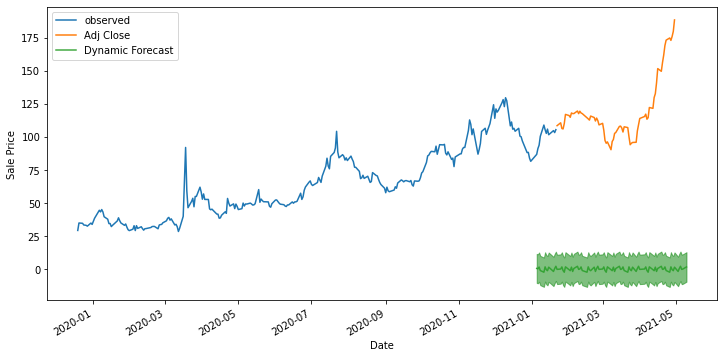

In [86]:
prediction_visual_4 = prediction_vis(pred_dynamic=pred_dynamic,pred_dynamic_conf=pred_dynamic_conf,
                                     train=train,test=test,one_adj_c= adj_close)

In [87]:
metric_func_one(pred, test, sarima_col= adj_close)

The Mean Squared Error of our forecasts is 18.07
The Root Mean Squared Error of our forecasts is 4.25


(18.06908867727748, 4.250775067829099)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                  349
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1020.014
Date:                              Mon, 10 May 2021   AIC                           2052.028
Time:                                      09:44:31   BIC                           2074.676
Sample:                                           0   HQIC                          2061.070
                                              - 349                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0259      0.036     28.572      0.000       0.956       1.096
ar.L2         -0.1387      0.075     -1.852      0.064      -0.286       0.008
ar.L3          0.1146      0.047      2.414      0.016       0.022       0.208
ar.S.L12      -0.0002      0.064     -0.004      0.997      -0.126       0.126
ma.S.L12      -0.9511      0.059    -16.241      0.000      -1.066      -0.836
sigma2        31.0678      1.561     19.898      0.000      28.008      34.128
===================================================================================
Ljung-Box (Q):                       26.52   Jarque-Bera (JB):               890.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.56
Prob(H) (two-sided):                  0.16   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



MODEL DIAGNOSTICS


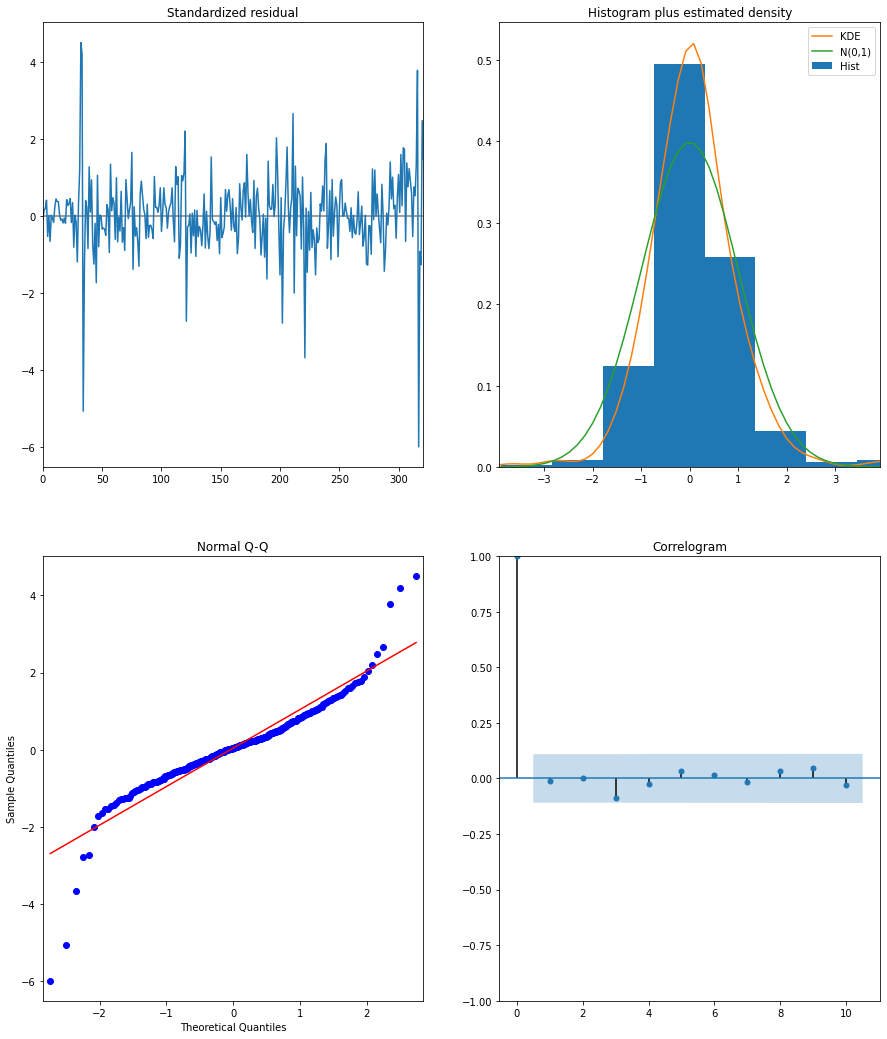

In [88]:
history_type = adj_close #history_type = 'Adj Close'
zip_params = output_df[output_df['hist']==history_type]
zip_params.pdq.values[0]
zip_params.seasonal_pdq.values[0]

output_sarima = fit_ARIMA(bntx_df[history_type],order=zip_params.pdq.values[0] ,seasonal_order= zip_params.seasonal_pdq.values[0] )
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_sarima.get_prediction(start=pd.to_datetime('2021-01-05'), dynamic=True,full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [89]:
metric_func_dynamic(pred_dynamic, test, adj_close)

The Mean Squared Error of the forecast is 1051.73
The Root Mean Squared Error of the forecast is 32.43


(1051.7259270472398, 32.43032418967223)

In [90]:
data = {
        'RMSE/One':         [0.53, 0.02,0.53,  6.6, 74.67, 6.46, 4.3],
        'RMSE/Dyn':         [3.02, 1.57,0.53,  41.42,17.24,  6.67,35.11]}

df = pd.DataFrame(data, index =['PFE/Adj Close',
                                'PFE/MA_50',
                                'PFE/Actual_Changes',
                                'BNTX/Adj Close',
                                'BNTX/MA_50',
                                 'BNTX/actual_changes',
                                 'NVAX /Adj Close'])

In [91]:
"""                  min        max          mean

BNTX/Adj Close       12.7500    208.899      70.957
NVAX/Adj Close       28.54999   188.279      76.534              
"""

df

,RMSE/One,RMSE/Dyn
PFE/Adj Close,0.53,3.02
PFE/MA_50,0.02,1.57
PFE/Actual_Changes,0.53,0.53
BNTX/Adj Close,6.60,41.42
BNTX/MA_50,74.67,17.24
BNTX/actual_changes,6.46,6.67
NVAX /Adj Close,4.30,35.11


### Conclusion for ARIMA Models
For each model I ran One-Step Ahead Forecasting and Dynamic Forecasting to see if that made a difference in the models forecasting.
Regarding Pfizer, I ran the models with the columns Adj_Close, MA_50, Actual_Changes.  Pfizer is not a volatile stock.  With One-Step Ahead the models did really well and the predicitons were off by around 0.53 or less.  In Dynamic Forecasting, the models still performed well but with Adj_Close column model was off 3.02.<br>
<br>
BNTX is a volatile stock.  The average price of the stock was 70.95. However, the price fluctuated from a low of 12.7500 to a high of 208.899.  With column actual_changes the model performed exceeding well with both one-Step and Dynamic and was off 6.46 and 6.67 for both.  The above chart shows that with column MA_50 and One-Step the model was off 74.67 which is a lot consdiering the average for price for the MA_50 column was 69.456025.<br>
<br>
NVAX is also a volatile stock.  One-Step performed really well and predictions were only off $4.30.
Overall, I think the models performed pretty well consdiering that I used the Auto_Arima model to get the pdqs with lowest AIC and no other tuning.<br>
<br>
In response to the question, the models probably perform about the same because the price volatility of the stock have a lot to do with the performance of the models.